# Credit Card Users Churn Prediction

## Problem Statement

![Credit Card Image](Credit-Cards.jpg)

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg Utilization Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bank= pd.read_csv('/content/drive/MyDrive/DSML/UnivTex_AIML/Project Folder/Credit Card Users Churn Prediction/BankChurners.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
bank.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
bank.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

### Data Types and Column Counts

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations:**
- There are 10,127 rows from 0 - 10126 and 21 columns
- There are 15 numeric features and 6 non-numeric features
- Education Level and Marital Status has missing values

### Summary of the Dataset

In [ ]:
bank.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

In [ ]:
bank.describe(include='object').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

**Observations:**

- Many of the features appears to have normal distributions
- Categories relating to income, credit-limits, available balances, etc are more heavily right-skewed, as would be expected.
- The average and mean customer age is 46.
- The average customer relationship length for this dataset is 36 months

### Check for Missing and Duplicate values

In [ ]:
# let's check for duplicate values in the data
bank.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(bank.isnull().sum() / bank.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

**Observations:**
- Education Level is missing 15% of its values
- Marital Status is missing 7.4% of its values

In [ ]:
for i in bank.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(bank[i].value_counts())
    print("*" * 30)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
******************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
******************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
******************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
******************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
******************************
Unique values in Card_Category are :
Blue        9436
Silver       555
Gold         116
Platinum   

**The Income Category column appears to have missing values as well**

In [ ]:
# list of all categorical variables
col_counts = bank.columns

# printing the number of occurrences of each unique value in each categorical column
for column in col_counts:
    print(bank[column].value_counts(normalize=True))
    print("-" * 50)

768805383   0.000
711784908   0.000
720133908   0.000
803197833   0.000
812222208   0.000
             ... 
796903083   0.000
716014983   0.000
712521783   0.000
780045708   0.000
714337233   0.000
Name: CLIENTNUM, Length: 10127, dtype: float64
--------------------------------------------------
Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64
--------------------------------------------------
44   0.049
49   0.049
46   0.048
45   0.048
47   0.047
43   0.047
48   0.047
50   0.045
42   0.042
51   0.039
53   0.038
41   0.037
52   0.037
40   0.036
39   0.033
54   0.030
38   0.030
55   0.028
56   0.026
37   0.026
57   0.022
36   0.022
35   0.018
59   0.016
58   0.016
34   0.014
33   0.013
60   0.013
32   0.010
65   0.010
61   0.009
62   0.009
31   0.009
26   0.008
30   0.007
63   0.006
29   0.006
64   0.004
27   0.003
28   0.003
67   0.000
66   0.000
68   0.000
70   0.000
73   0.000
Name: Customer_Age, dtype: float64
----------------------------------

In [ ]:
churn = bank.copy()

In [ ]:
churn.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# Encoding Existing and Attrited customers to 0 and 1 for analysis.
churn["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
churn["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

### Number of unique values in each column

In [ ]:
churn.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                6
Marital_Status                 3
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

#### Attrition Flag Analysis

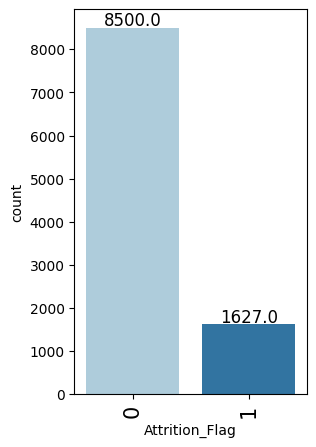

In [ ]:
labeled_barplot(churn, "Attrition_Flag")

In [ ]:
churn["Attrition_Flag"].value_counts(normalize=True)

0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

**Observation:**

- We have an unbalanced target variable with 84% of the values indicating Existing Customers (0) and 16% indicating Attrited Customers (1).

#### Customer Age Analysis

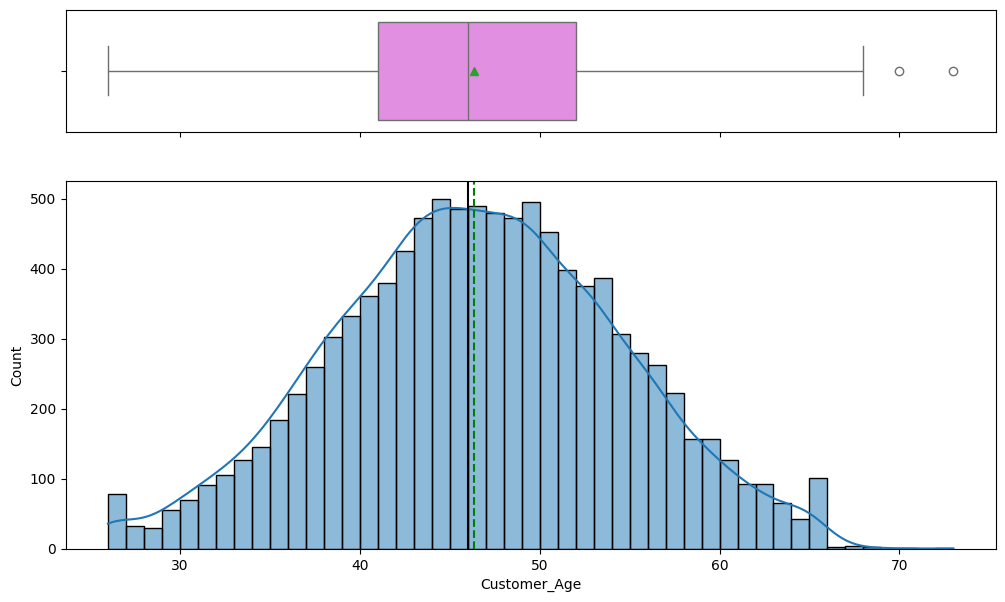

In [ ]:
histogram_boxplot(churn, "Customer_Age", kde=True)

#### Gender Analysis

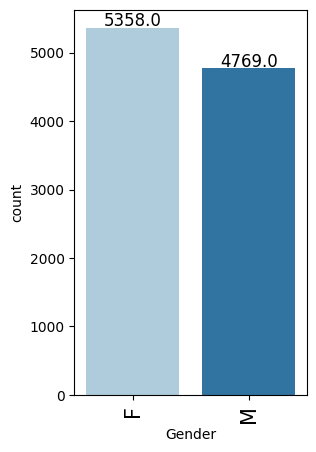

In [ ]:
labeled_barplot(churn, "Gender")

In [ ]:
churn["Gender"].value_counts(normalize=True)

F   0.529
M   0.471
Name: Gender, dtype: float64

#### Dependent Count Analysis

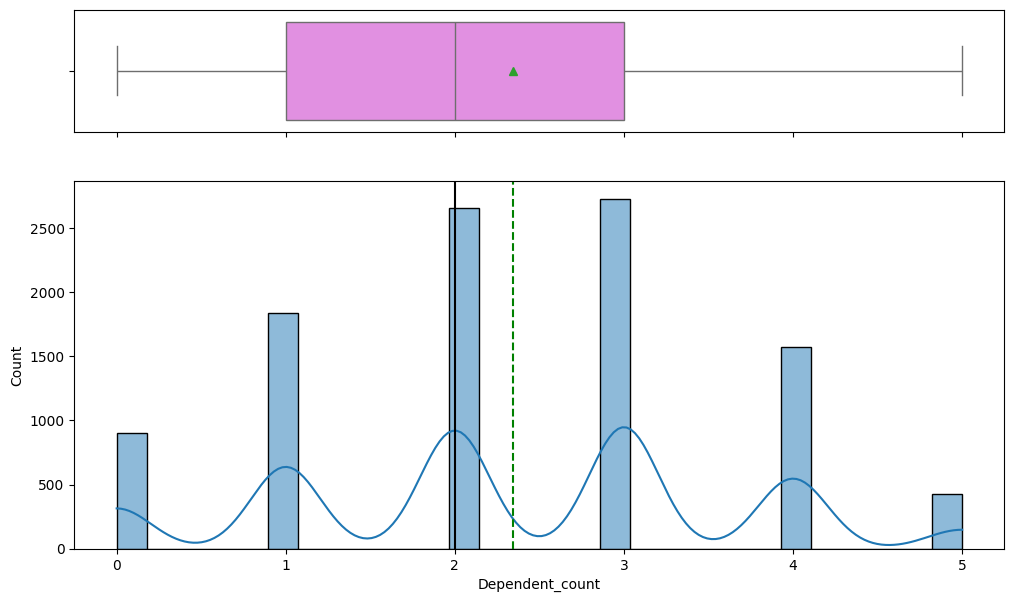

In [ ]:
histogram_boxplot(churn, "Dependent_count", kde=True)

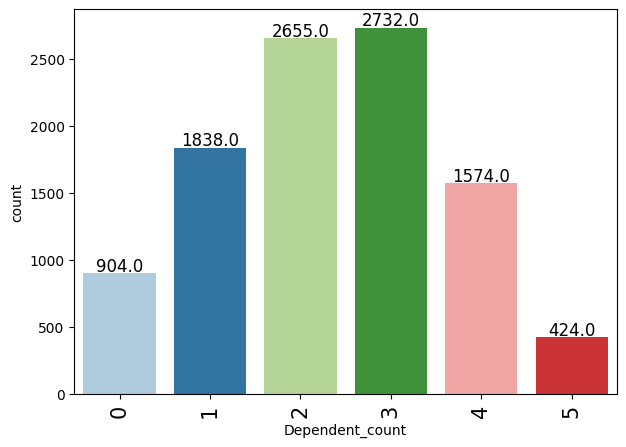

In [ ]:
labeled_barplot(churn, "Dependent_count")

#### Education Level Analysis

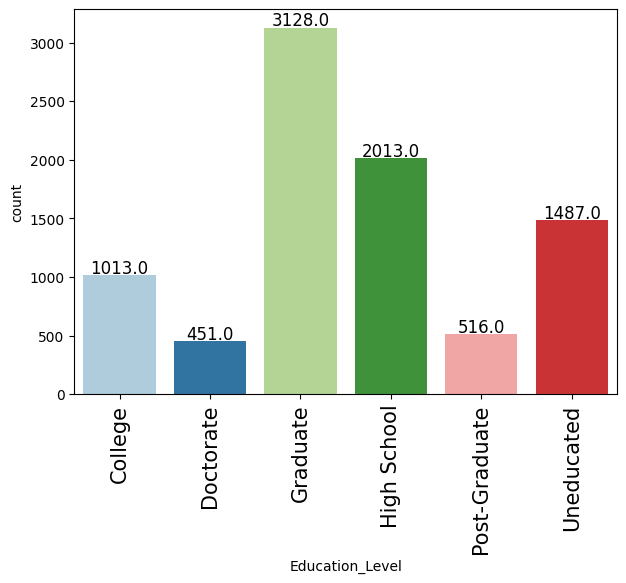

In [ ]:
labeled_barplot(churn, "Education_Level")

In [ ]:
churn["Education_Level"].value_counts(normalize=True)

Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: Education_Level, dtype: float64

In [ ]:
churn["Education_Level"].isnull().value_counts()

False    8608
True     1519
Name: Education_Level, dtype: int64

**Obervation:**

- 59% of customers aren't college educated

#### Marital Status Analysis

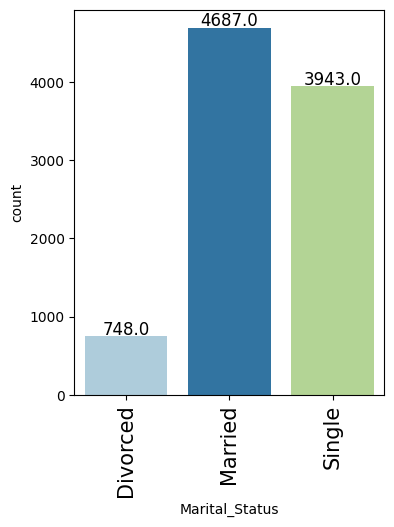

In [ ]:
labeled_barplot(churn, "Marital_Status")

In [ ]:
churn["Marital_Status"].value_counts(normalize=True)

Married    0.500
Single     0.420
Divorced   0.080
Name: Marital_Status, dtype: float64

In [ ]:
# how many missing values are there in Marital_Status
churn["Marital_Status"].isnull().sum()

749

#### Income Category Analysis

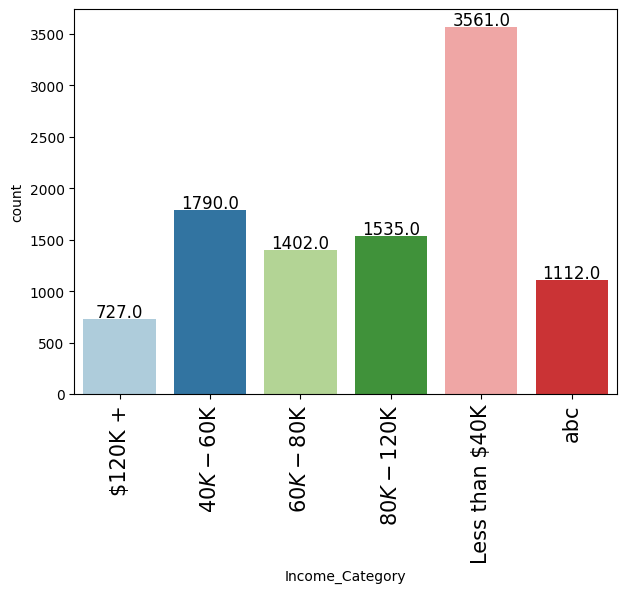

In [ ]:
labeled_barplot(churn, "Income_Category")

In [ ]:
churn["Income_Category"].value_counts(normalize=True)

Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: Income_Category, dtype: float64

**Observation: Income Category has strange "abd" values that need to be treated**

#### Card Category Analysis

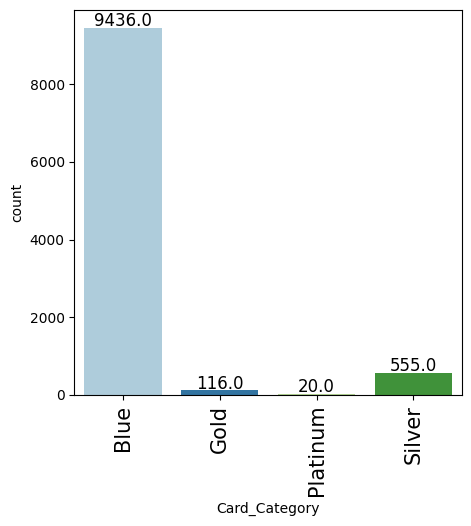

In [ ]:
labeled_barplot(churn, "Card_Category")

In [ ]:
churn["Card_Category"].value_counts(normalize=True)

Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: Card_Category, dtype: float64

#### Months on Book Analysis

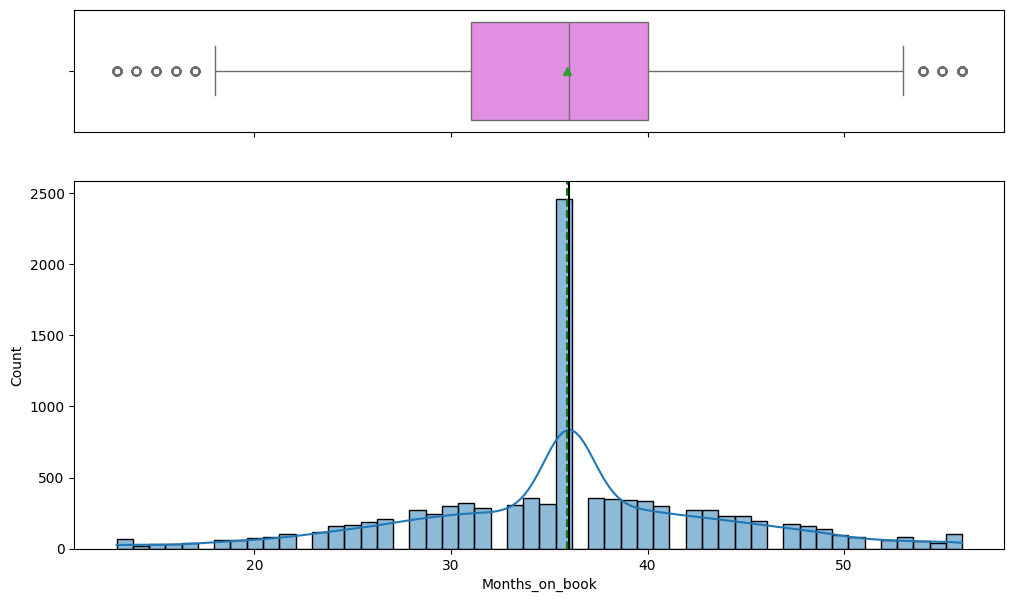

In [ ]:
histogram_boxplot(churn, "Months_on_book", kde=True)

#### Total Relationship Count Analysis

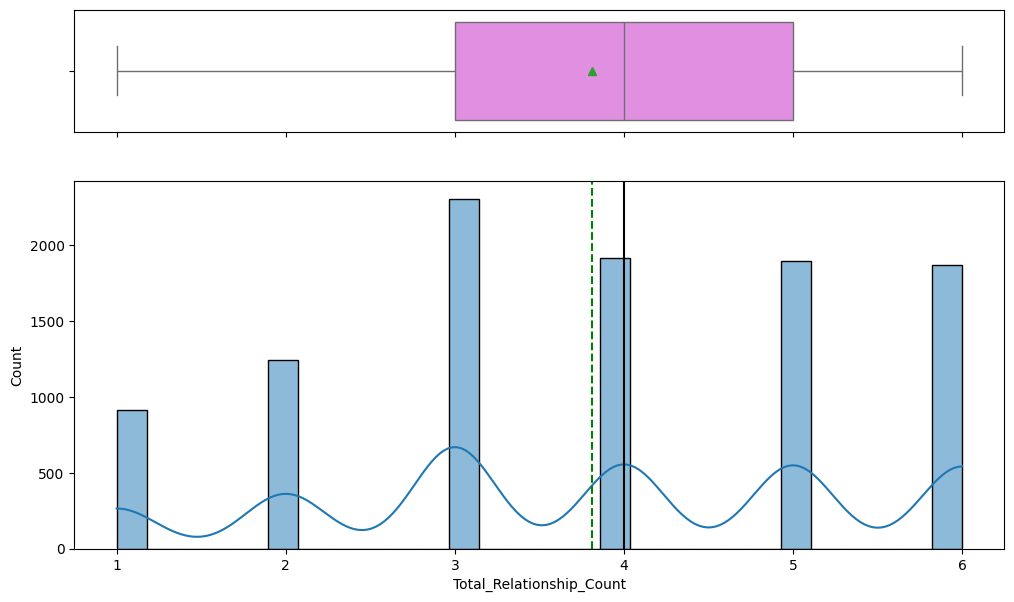

In [ ]:
histogram_boxplot(churn, "Total_Relationship_Count", kde=True)

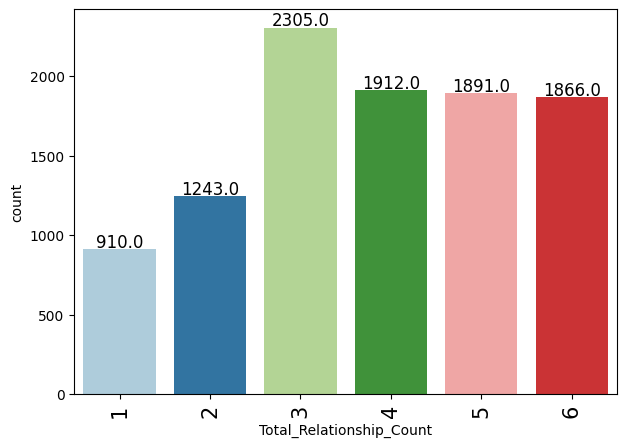

In [ ]:
labeled_barplot(churn, "Total_Relationship_Count")

In [ ]:
churn["Total_Relationship_Count"].value_counts(normalize=True)

3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: Total_Relationship_Count, dtype: float64

#### Months Inactive in the last 12 Months

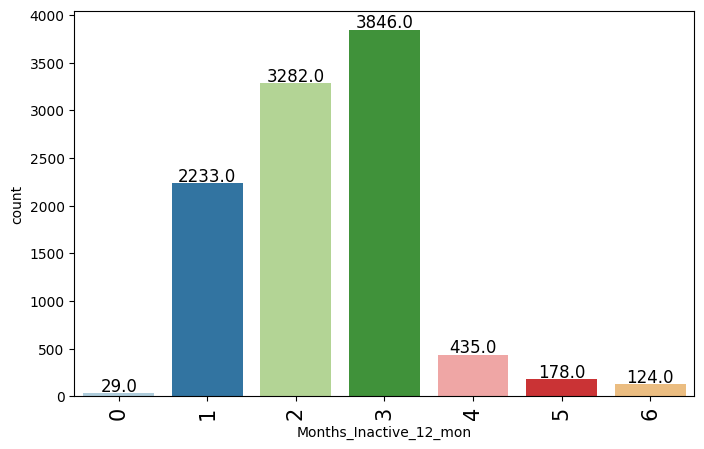

In [ ]:
labeled_barplot(churn, "Months_Inactive_12_mon")

In [ ]:
churn["Months_Inactive_12_mon"].value_counts(normalize=True)

3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: Months_Inactive_12_mon, dtype: float64

#### Number of Contacts between the customer and bank in last 12 months Analysis

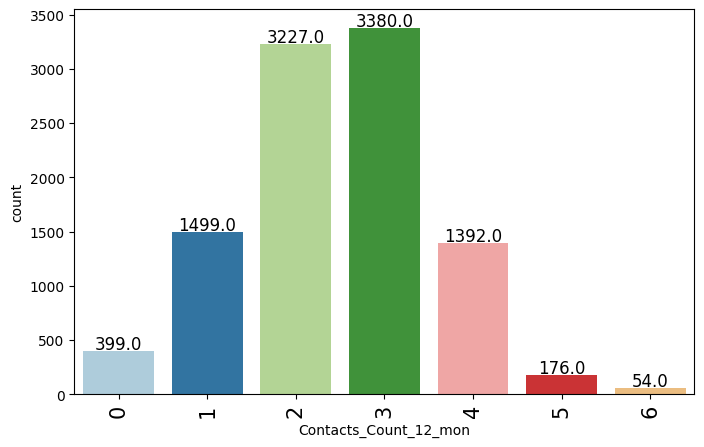

In [ ]:
labeled_barplot(churn, "Contacts_Count_12_mon")

In [ ]:
churn["Contacts_Count_12_mon"].value_counts(normalize=True)

3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017
6   0.005
Name: Contacts_Count_12_mon, dtype: float64

#### Credit Limit Analysis

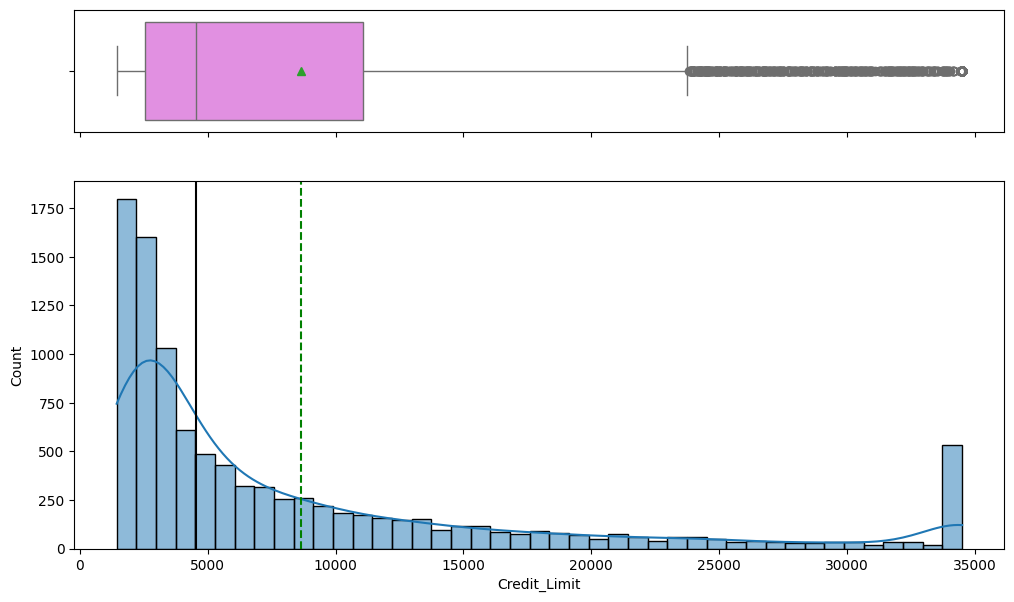

In [ ]:
histogram_boxplot(churn, "Credit_Limit", kde=True)

#### Total Revolving Balance Analysis

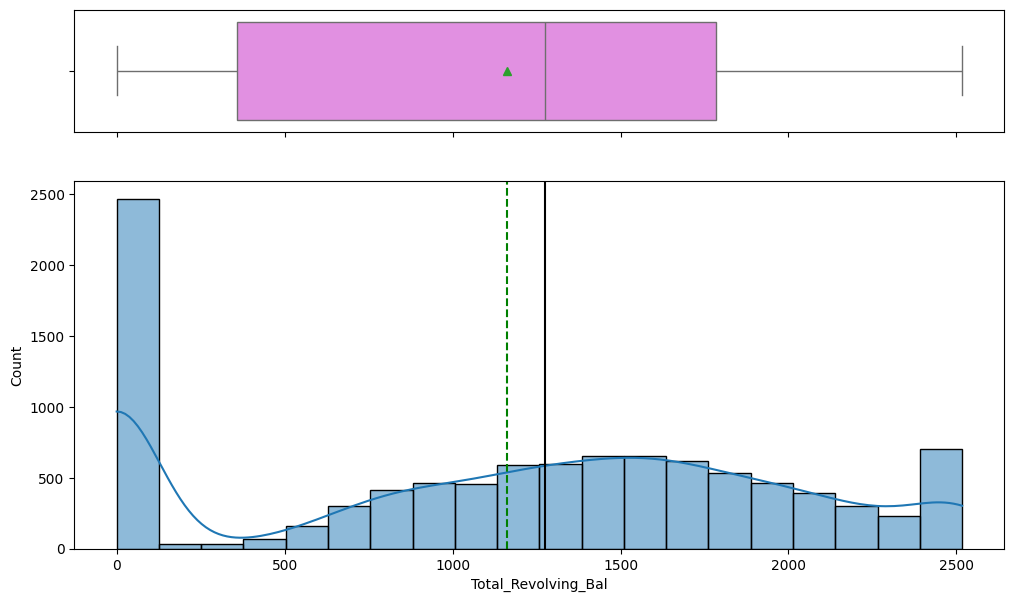

In [ ]:
histogram_boxplot(churn, "Total_Revolving_Bal", kde=True)

#### Average Available Amount left on Credit Card Analysis


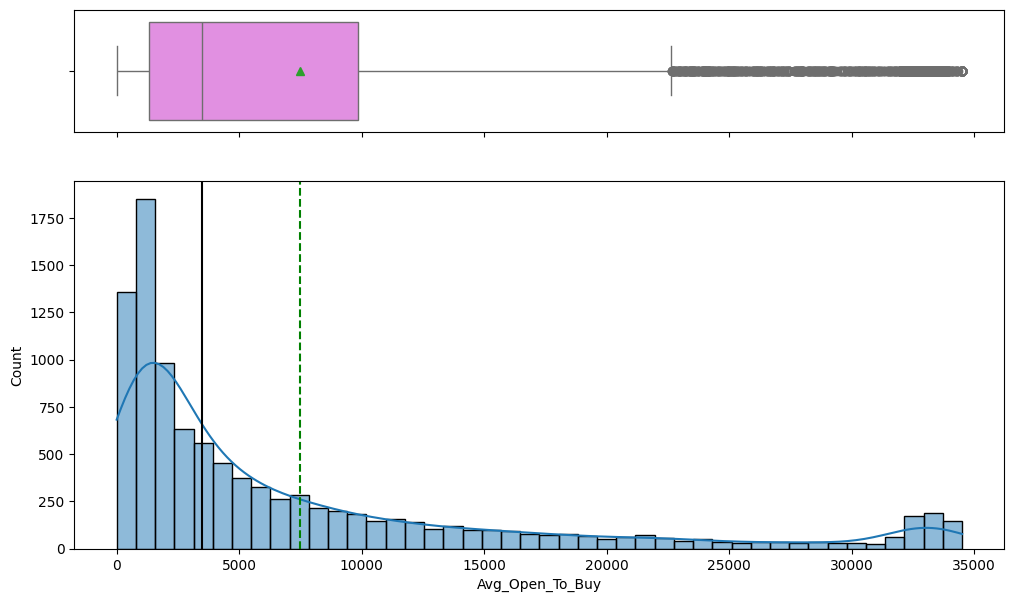

In [ ]:
histogram_boxplot(churn, "Avg_Open_To_Buy", kde=True)

#### Total Transaction Amount- Last 12 Months Analysis

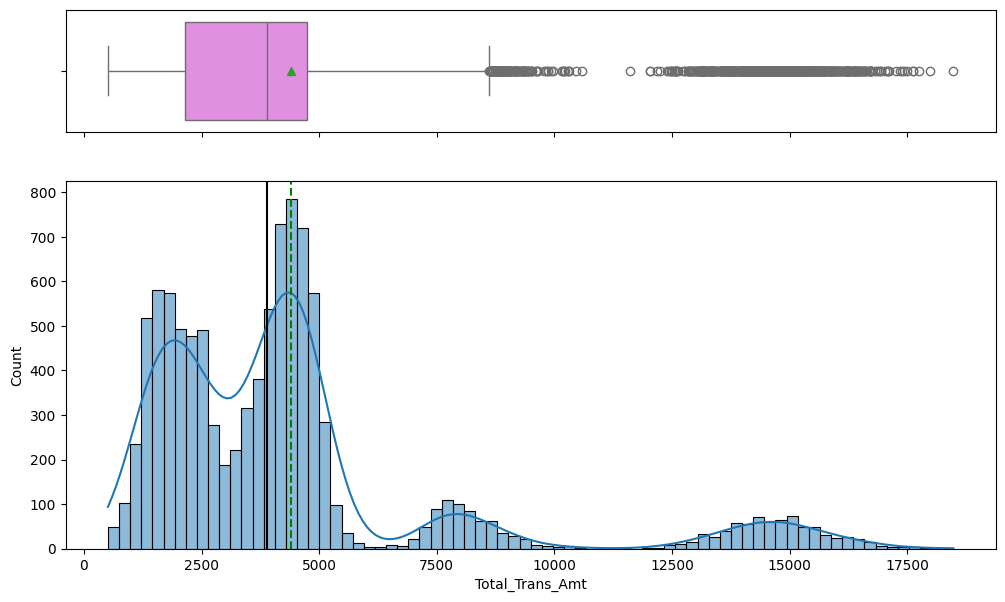

In [ ]:
histogram_boxplot(churn, "Total_Trans_Amt", kde=True)

#### Total Transaction Count: Last 12 Months Analysis

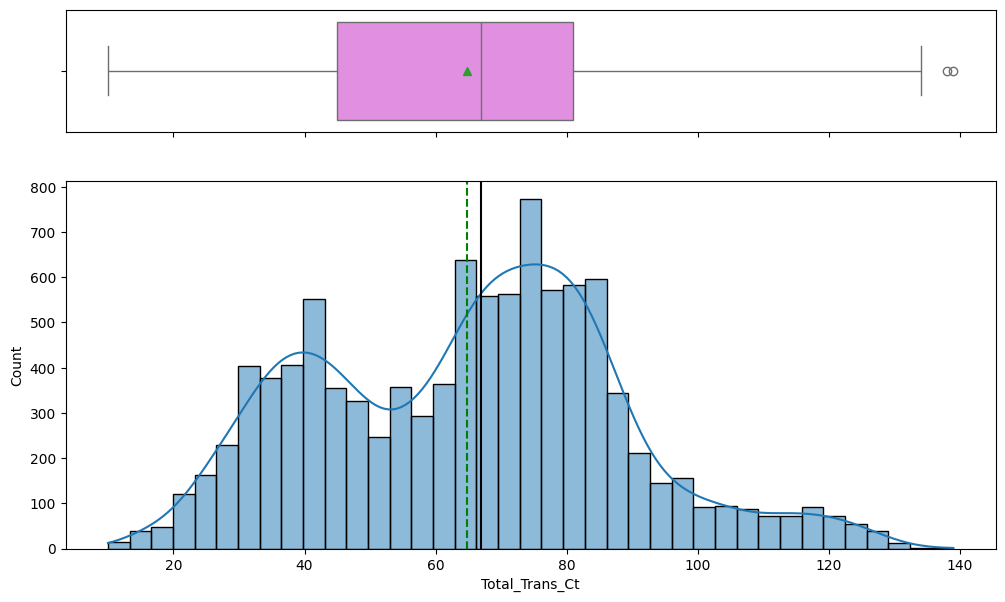

In [ ]:
histogram_boxplot(churn, "Total_Trans_Ct", kde=True)

#### Ratio of Total Transaction Count in 4th Quarter and Total Transaction Count in 1st Quarter

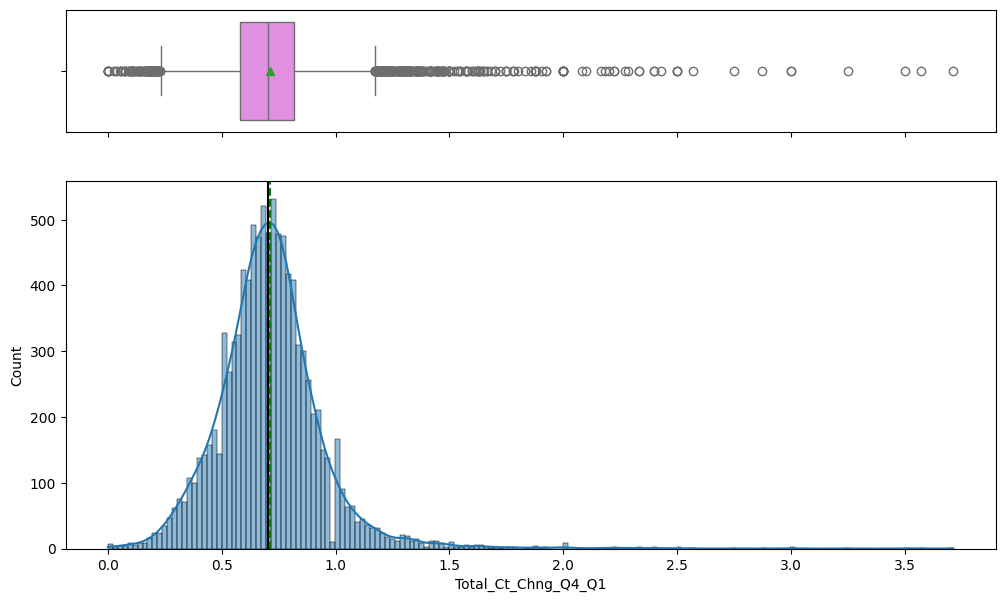

In [ ]:
histogram_boxplot(churn, "Total_Ct_Chng_Q4_Q1", kde=True)

#### Ratio of Total Transaction Amount 4th Quarter and Total Transaction Amount 1st Quarter

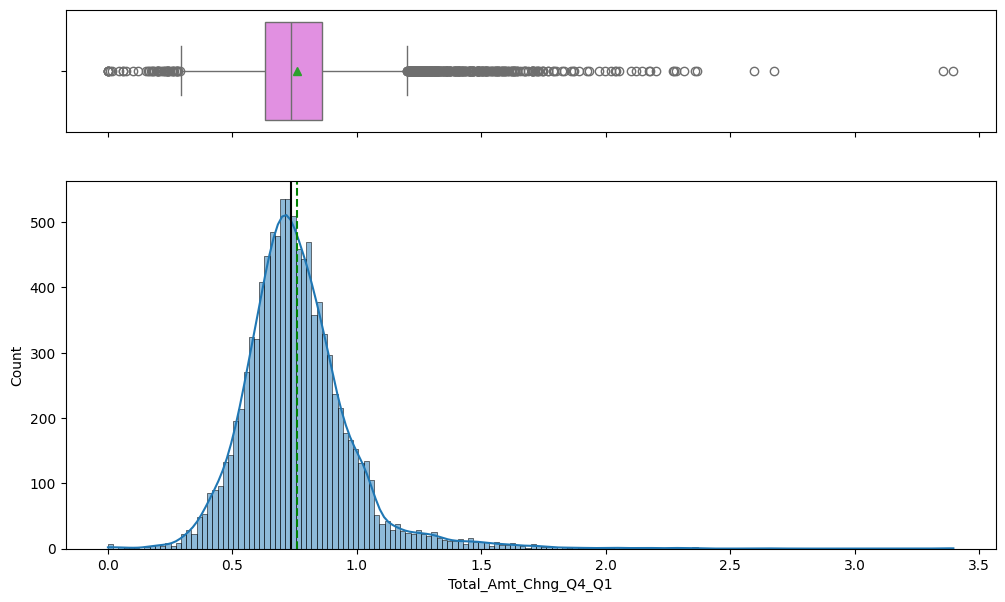

In [ ]:
histogram_boxplot(churn, "Total_Amt_Chng_Q4_Q1", kde=True)

#### Average Utilization Ratio Analysis

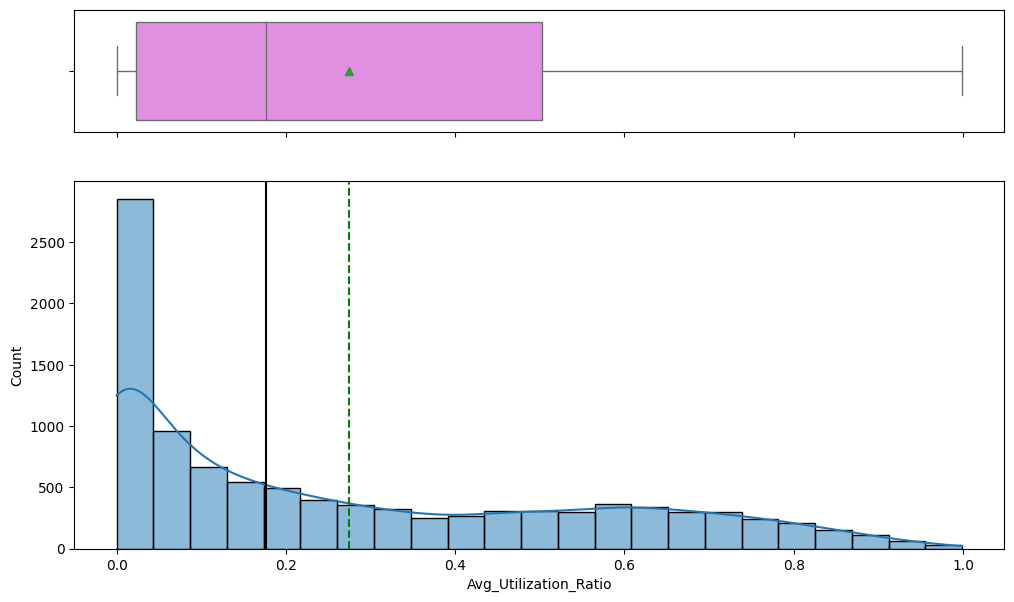

In [ ]:
histogram_boxplot(churn, "Avg_Utilization_Ratio", kde=True)

## Bivariate Analysis



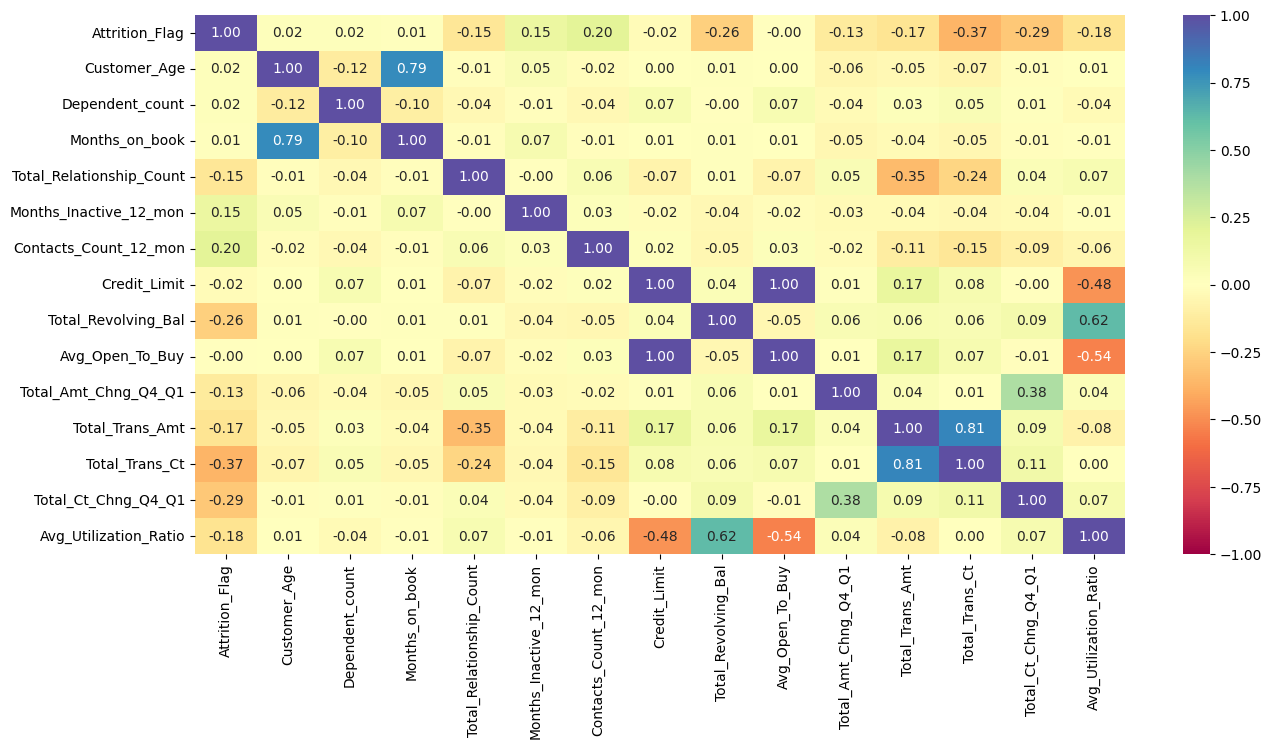

In [ ]:
# plot the correlation between attributes
plt.figure(figsize=(15, 7))
sns.heatmap(churn.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

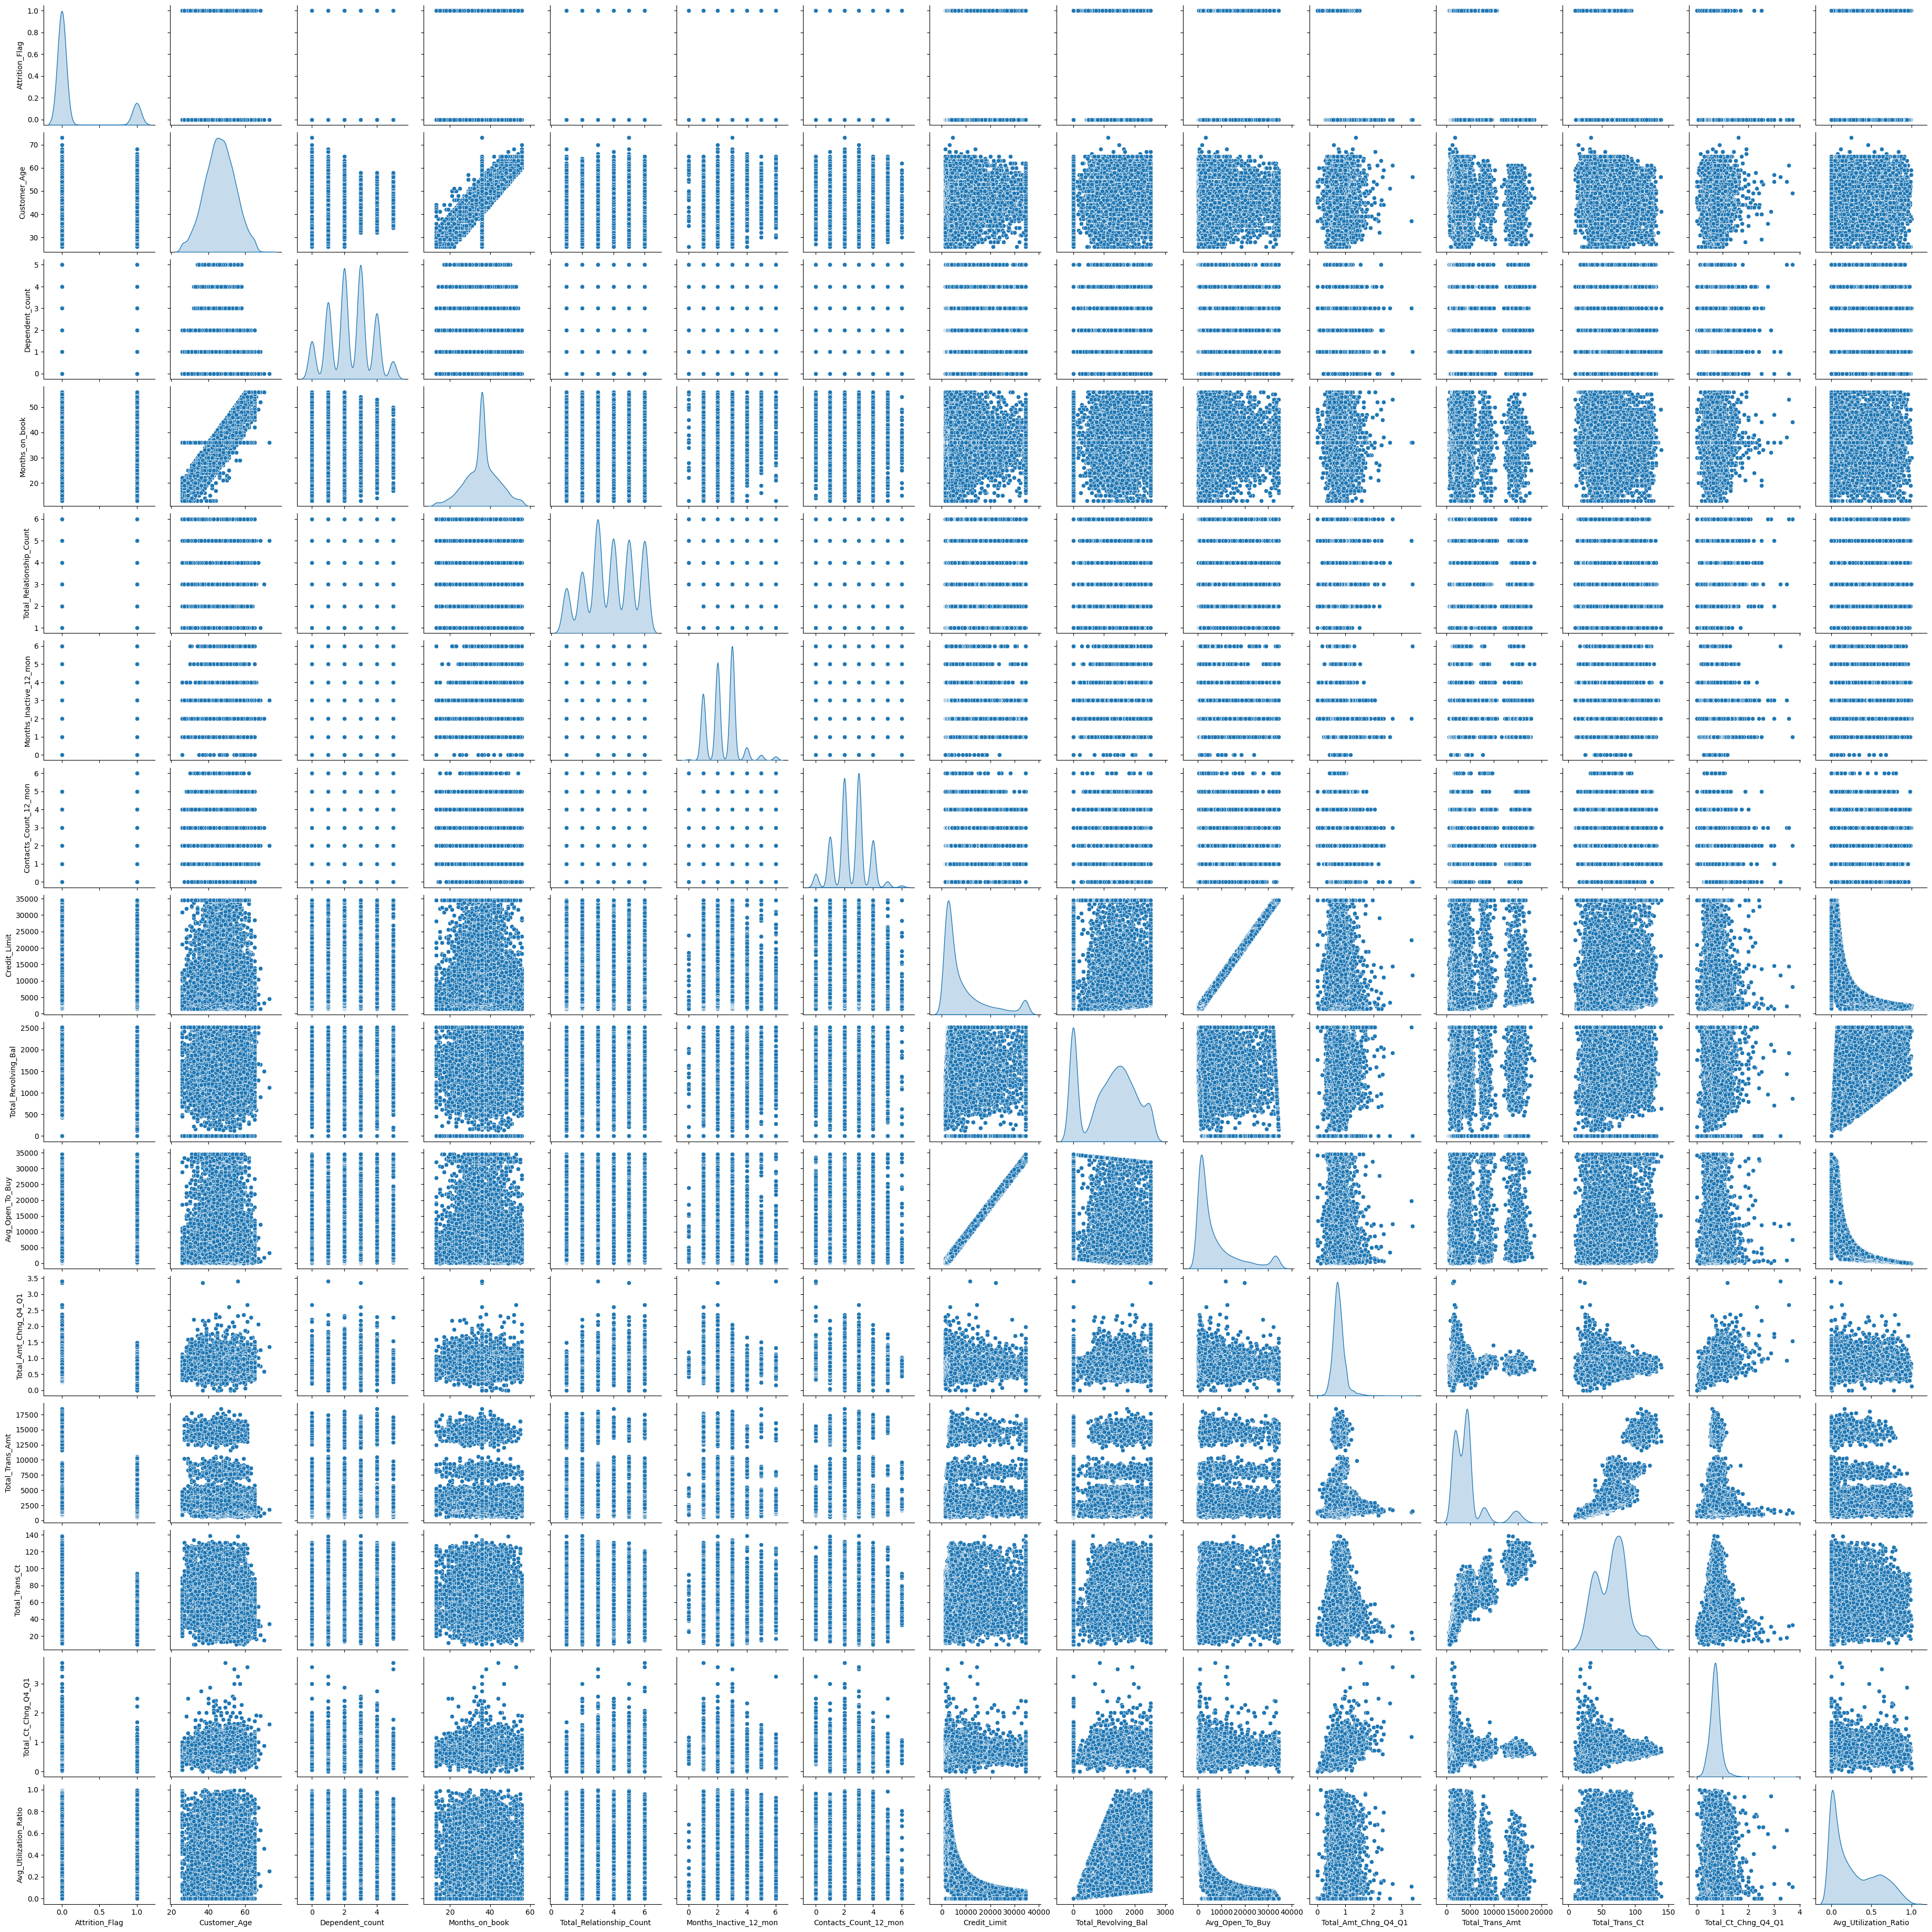

In [ ]:
sns.pairplot(data=churn, diag_kind="kde")
plt.show();

**Observation: Credit Limit and Average Open to Buy are 100% correlated. We will need to drop one of those attributes to reduce bias**

### Attrition_Flag vs Customer_Age Analysis

Attrition_Flag     0     1    All
Customer_Age                     
All             8500  1627  10127
43               388    85    473
48               387    85    472
44               416    84    500
46               408    82    490
45               407    79    486
49               416    79    495
47               403    76    479
41               303    76    379
50               381    71    452
54               238    69    307
40               297    64    361
42               364    62    426
53               328    59    387
52               318    58    376
51               340    58    398
55               228    51    279
39               285    48    333
38               256    47    303
56               219    43    262
59               117    40    157
37               223    37    260
57               190    33    223
58               133    24    157
36               197    24    221
35               163    21    184
33               107    20    127
34            

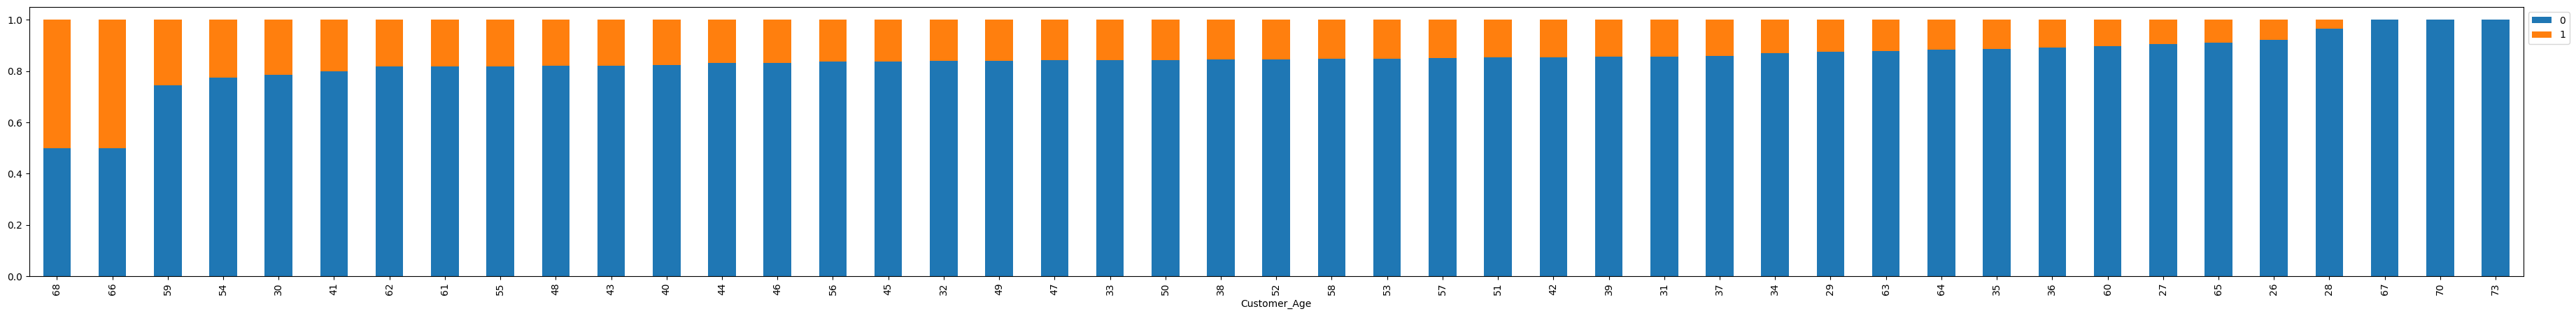

In [ ]:
stacked_barplot(churn, "Customer_Age", "Attrition_Flag")

**Observations:**

- The ages at which customers are most likely to leave the banks credit card services is 40+, with the greatest numbers between 50-60

### Attrition_Flag vs Gender Analysis

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


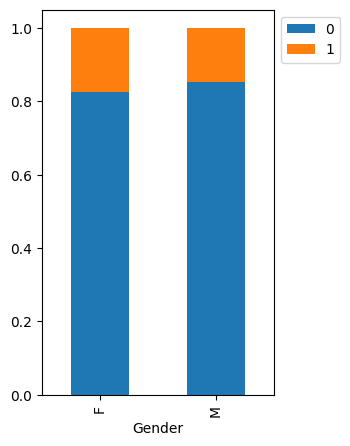

In [ ]:
stacked_barplot(churn, "Gender", "Attrition_Flag")

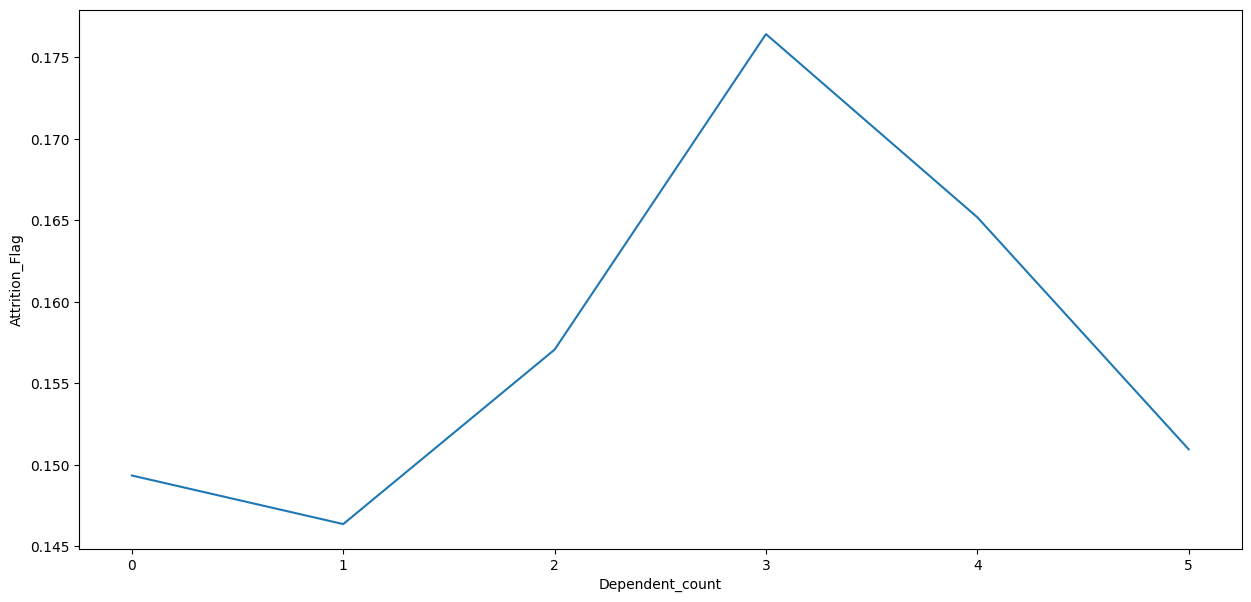

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=churn, x='Dependent_count', y ='Attrition_Flag', ci=None)
plt.show()

**Observation:**

- Women make up 57% of attrition rates
- Men make up 43% of attrition rates

### Attrition_Flag vs Dependent_Count Analysis

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


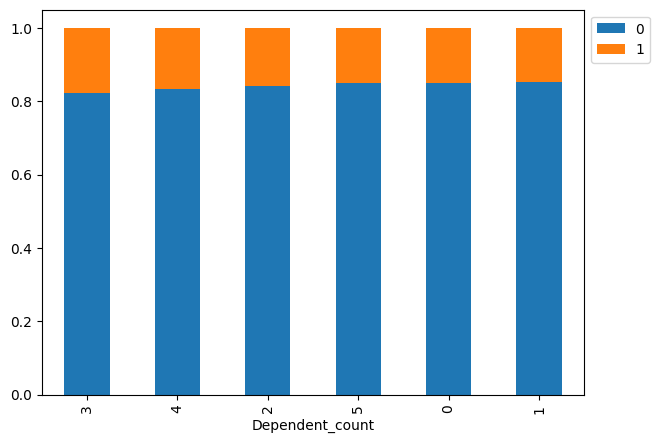

In [ ]:
stacked_barplot(churn, "Dependent_count", "Attrition_Flag")

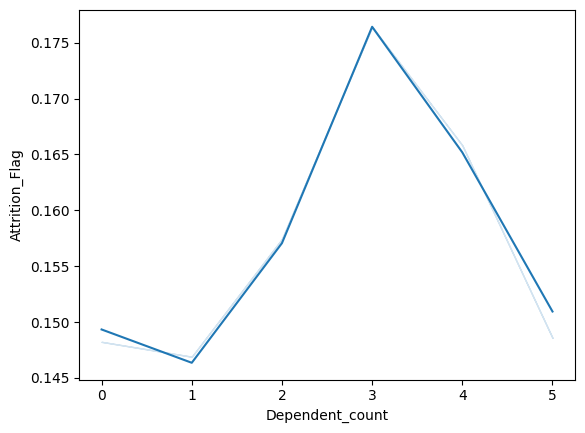

In [ ]:
sns.lineplot(data = churn , x = 'Dependent_count' , y = 'Attrition_Flag', ci = False);

**Observation:**

- Customers with 3-4 dependents make up 55% of the attrition rate in that columns

### Attrition_Flag vs Education_Level Analysis

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


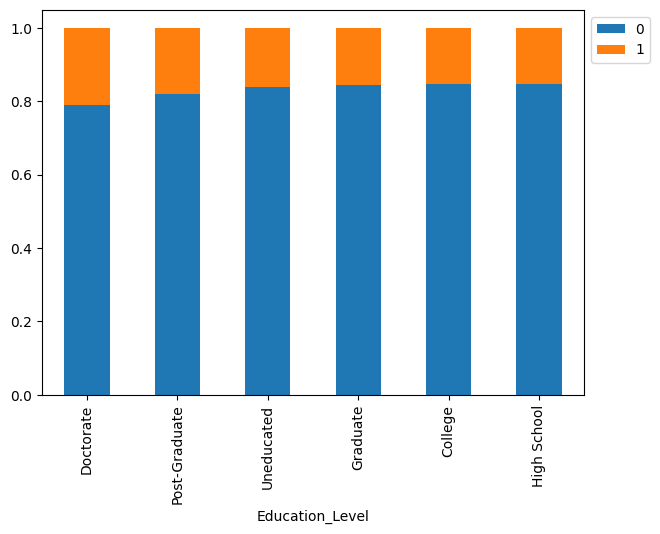

In [ ]:
stacked_barplot(churn, "Education_Level", "Attrition_Flag")

[Text(0, 0, 'High School'),
 Text(1, 0, 'Graduate'),
 Text(2, 0, 'Uneducated'),
 Text(3, 0, 'College'),
 Text(4, 0, 'Post-Graduate'),
 Text(5, 0, 'Doctorate')]

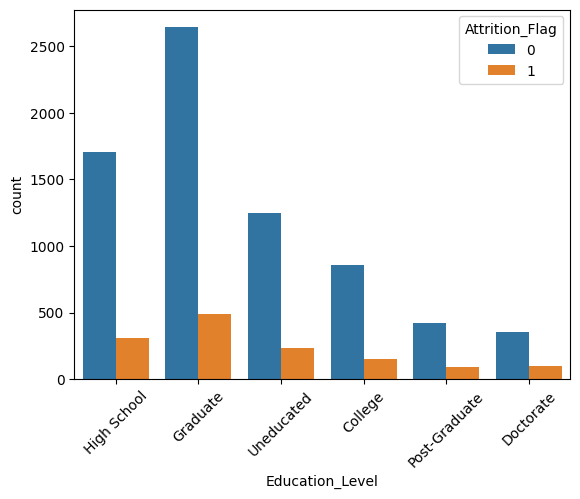

In [ ]:
#create seaborn countplot
my_plot = sns.countplot(data=churn, x='Education_Level', hue="Attrition_Flag" )

#rotate x-axis labels
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

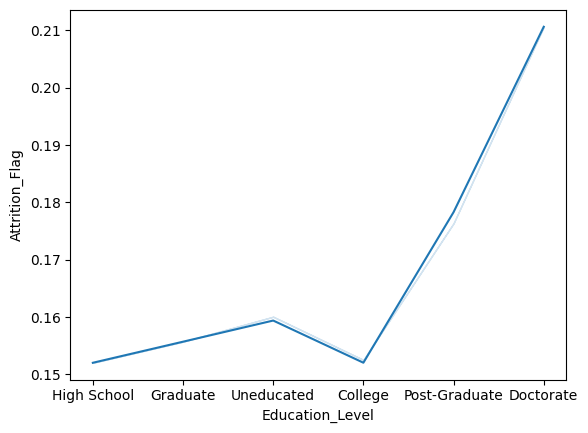

In [ ]:
sns.lineplot(data = churn , x = 'Education_Level' , y = 'Attrition_Flag', ci = False);

In [ ]:
# what percentage of each education level has an Attrition_flag of 1
crosstab = pd.crosstab(churn["Education_Level"], churn["Attrition_Flag"])

# Calculate the percentage of customers who churned in each education level
churn_rates = crosstab[1] / (crosstab[0] + crosstab[1])

# Print the churn rates
print("Churn Rates by Education Level:")
print(churn_rates)


Churn Rates by Education Level:
Education_Level
College         0.152
Doctorate       0.211
Graduate        0.156
High School     0.152
Post-Graduate   0.178
Uneducated      0.159
dtype: float64


**Observation:**

- Those with a Doctorate Degree have the highest rate of attrition followed by Post-Graduate comprising about 39% of attrited customers

### Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


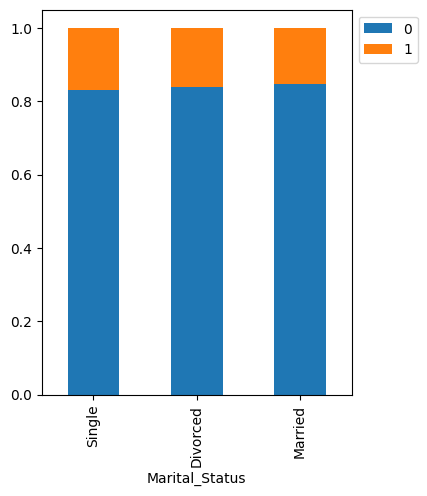

In [ ]:
stacked_barplot(churn, "Marital_Status", "Attrition_Flag")

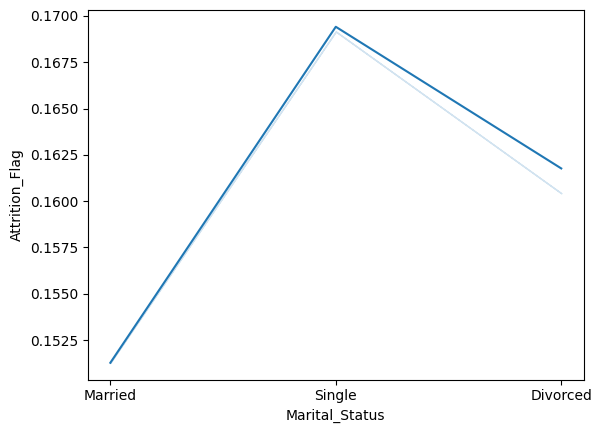

In [ ]:
sns.lineplot(data = churn , x = 'Marital_Status' , y = 'Attrition_Flag', ci = False);

**Observation:**

- Marital Status in not a good indicator of attrition as each sub-category accounts for 15-16% of attrited values in for their respective groups.
- However, diverced customers account for the smallest overall attrition values

### Attrition_Flag vs Income_Category Analysis

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


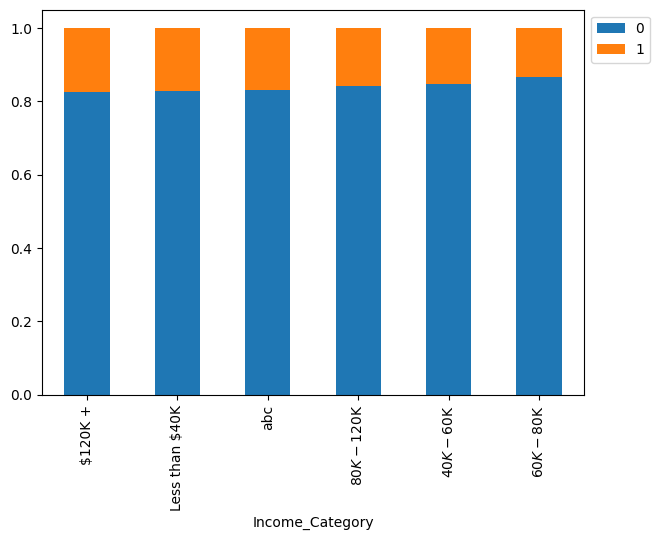

In [ ]:
stacked_barplot(churn, "Income_Category", "Attrition_Flag")

In [ ]:
# what percentage of each income category level has an attrition_flag value of 1
crosstab = pd.crosstab(churn["Income_Category"], churn["Attrition_Flag"])

# Calculate the percentage of customers who churned in each income category level
churn_rates = crosstab[1] / (crosstab[0] + crosstab[1])

# Print the churn rates
print("Churn Rates by Income Category:")
print(churn_rates)


Churn Rates by Income Category:
Income_Category
$120K +          0.173
$40K - $60K      0.151
$60K - $80K      0.135
$80K - $120K     0.158
Less than $40K   0.172
abc              0.168
dtype: float64


**Observation:**

- Those with Income less than $40k account for 38% of all attrition flags for that category

### Attrition_Flag vs Card_Category Analysis


Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


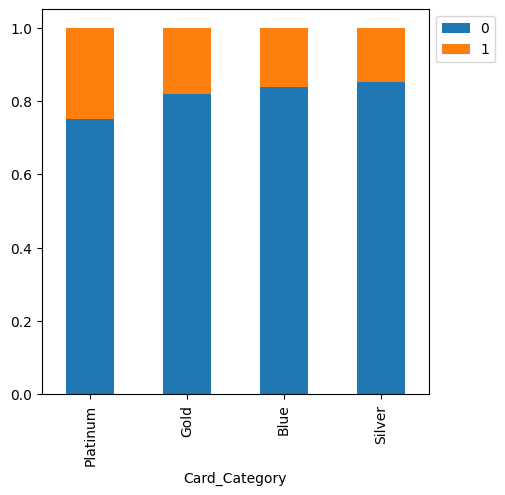

In [ ]:
stacked_barplot(churn, "Card_Category", "Attrition_Flag")

**Observation:**

- Blue cards account for 93% of all attrition flag values in the card category column and 16% of total attrition amoung Blue card holders

### Attrition_Flag vs Months_on_Book Analysis

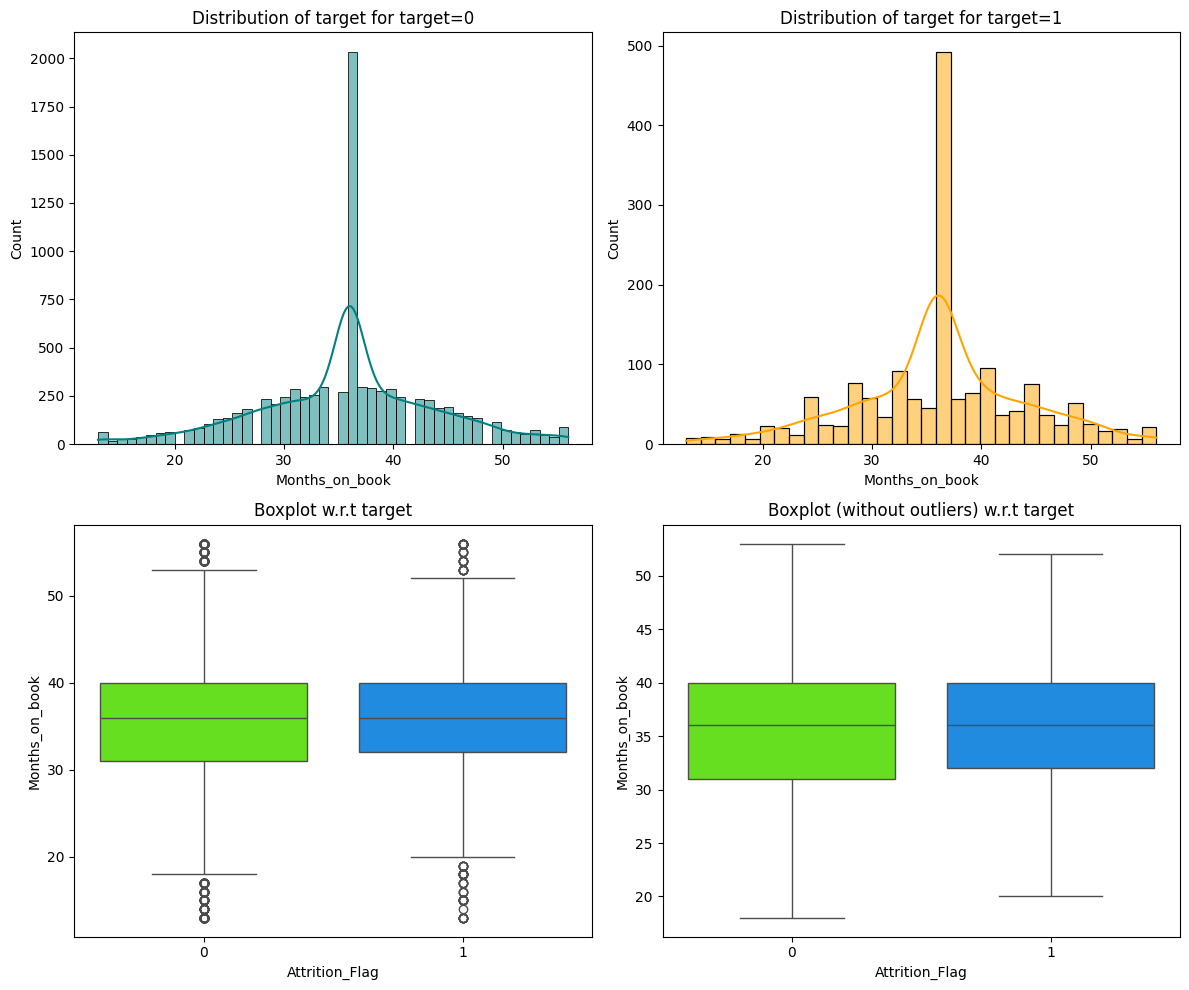

In [ ]:
distribution_plot_wrt_target(churn, "Months_on_book", "Attrition_Flag")

**Observation:**
- 36 months appears to be the most common value for both attrited and non attrited customers. Both have similar distributions

### Attrition_Flag vs Total_Relationship_Count Analysis

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


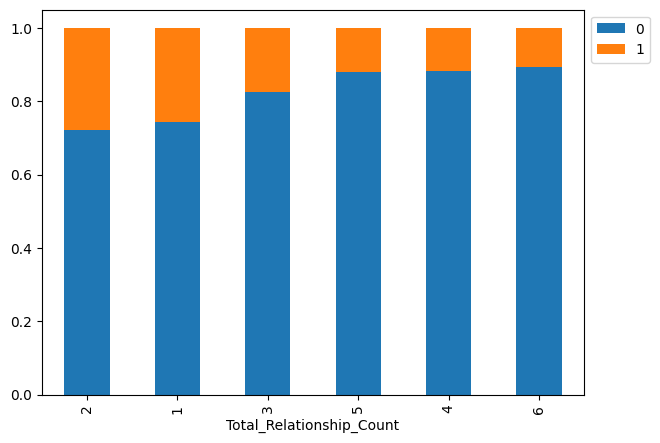

In [ ]:
stacked_barplot(churn, "Total_Relationship_Count", "Attrition_Flag")

**Observation:**

- Customers with fewer than 4 bank products are more likely to discontinue their credit cards

### Attrition_Flag vs Months_Inactive_12_mon Anlaysis

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


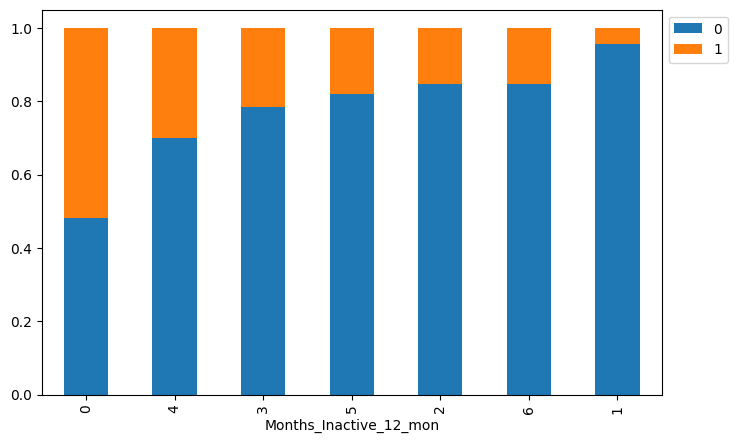

In [ ]:
stacked_barplot(churn, "Months_Inactive_12_mon", "Attrition_Flag")

**Observations:**
- Those with no inactivity in the last 12 months have the highest attrition rate in that range with a rate of almost 52%
- However, those with at least 3 months have inactivity hold 51% of the overall attrition flags

### Attrition_Flag vs Contacts_Count_12_mon Analysis

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


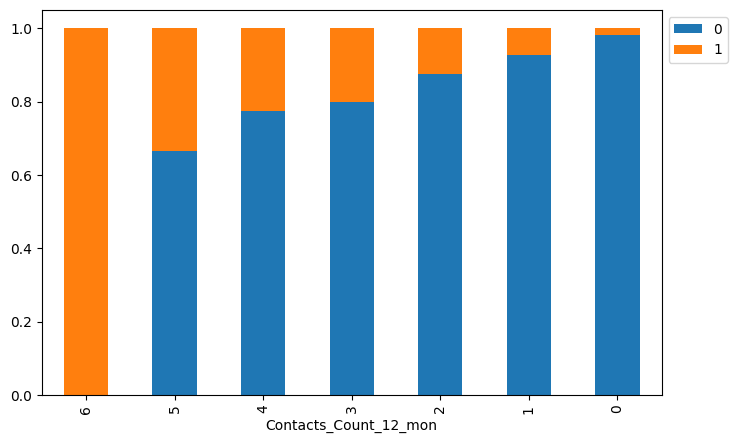

In [ ]:
stacked_barplot(churn, "Contacts_Count_12_mon", "Attrition_Flag")

**Observation:**

- The greater the number of interactions between the bank and the customer, the higher the chances of attrition with 6 interactions being our max value and the one indicating 100% attrition.

### Attrition_Flag vs Credit_Limit Analysis

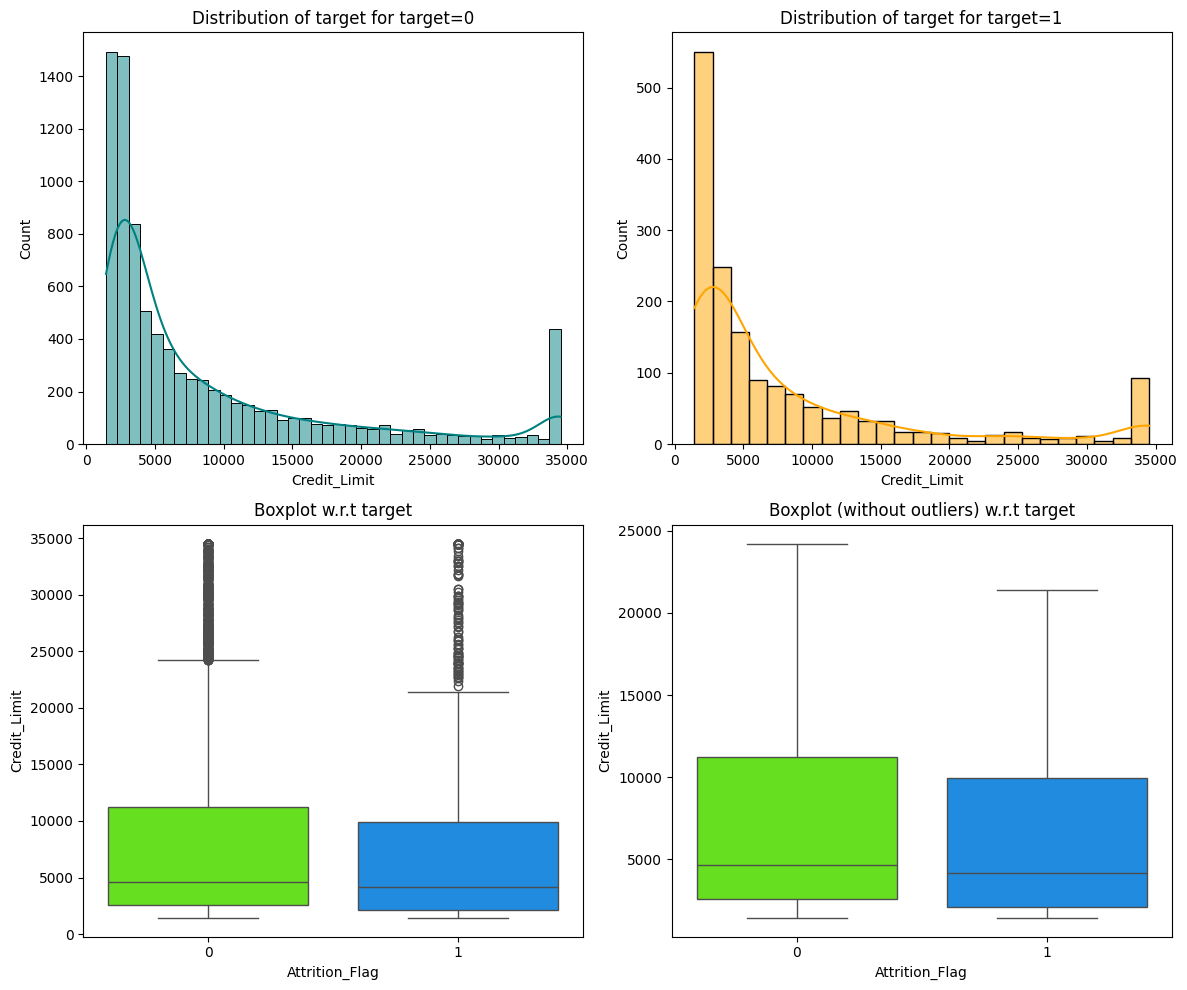

In [ ]:
distribution_plot_wrt_target(churn, "Credit_Limit", "Attrition_Flag")

**Observations:**

- Values have similar distributions. This is not a good indicator of attrition. Though the highest number of attrition flags are seen in credit limits less than $5,000.

### Attrition_Flags vs Total_Revolving_Bal Analysis

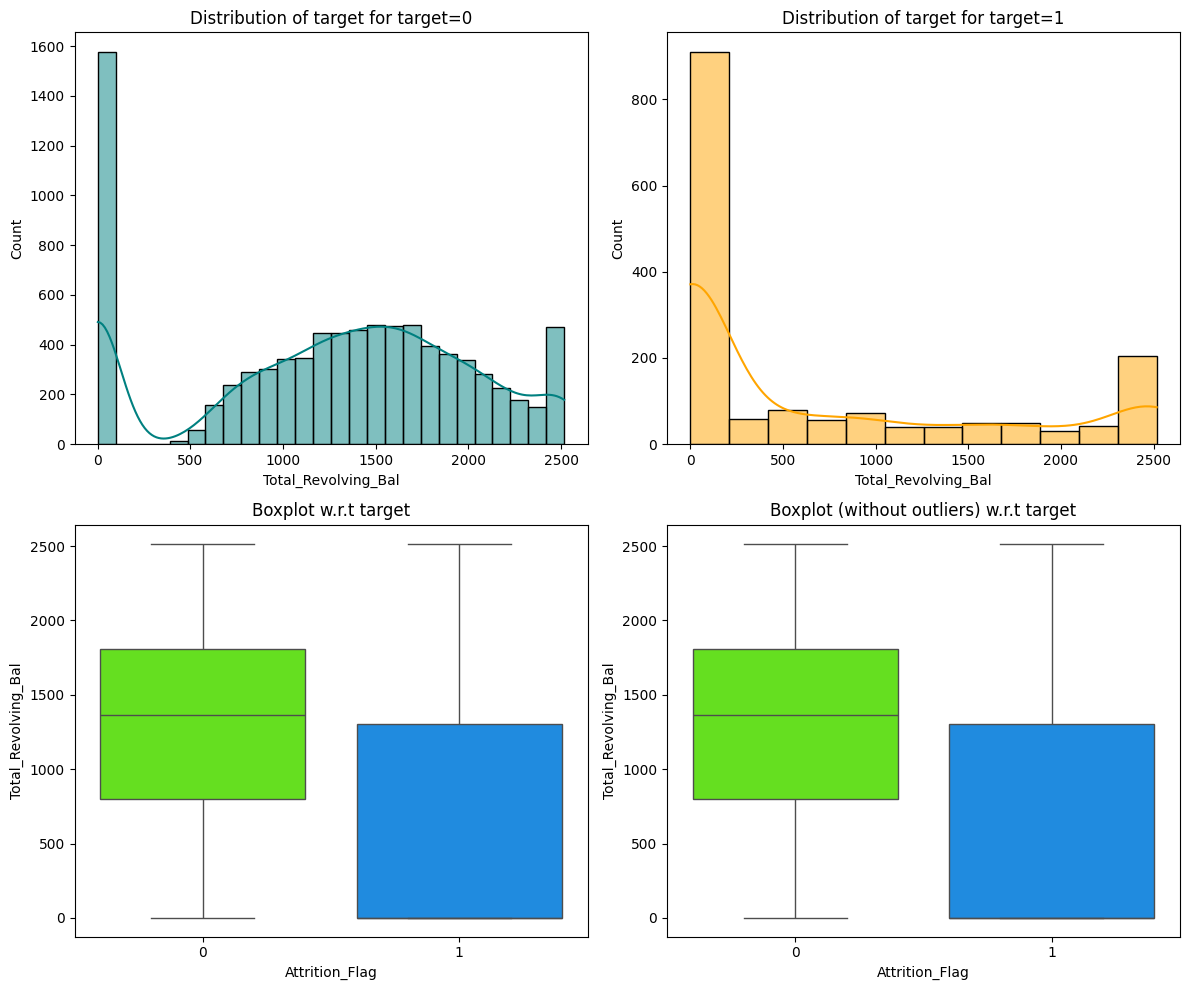

In [ ]:
distribution_plot_wrt_target(churn, "Total_Revolving_Bal", "Attrition_Flag")

### Attrition_Flag vs Avg_Open_To_Buy Analysis

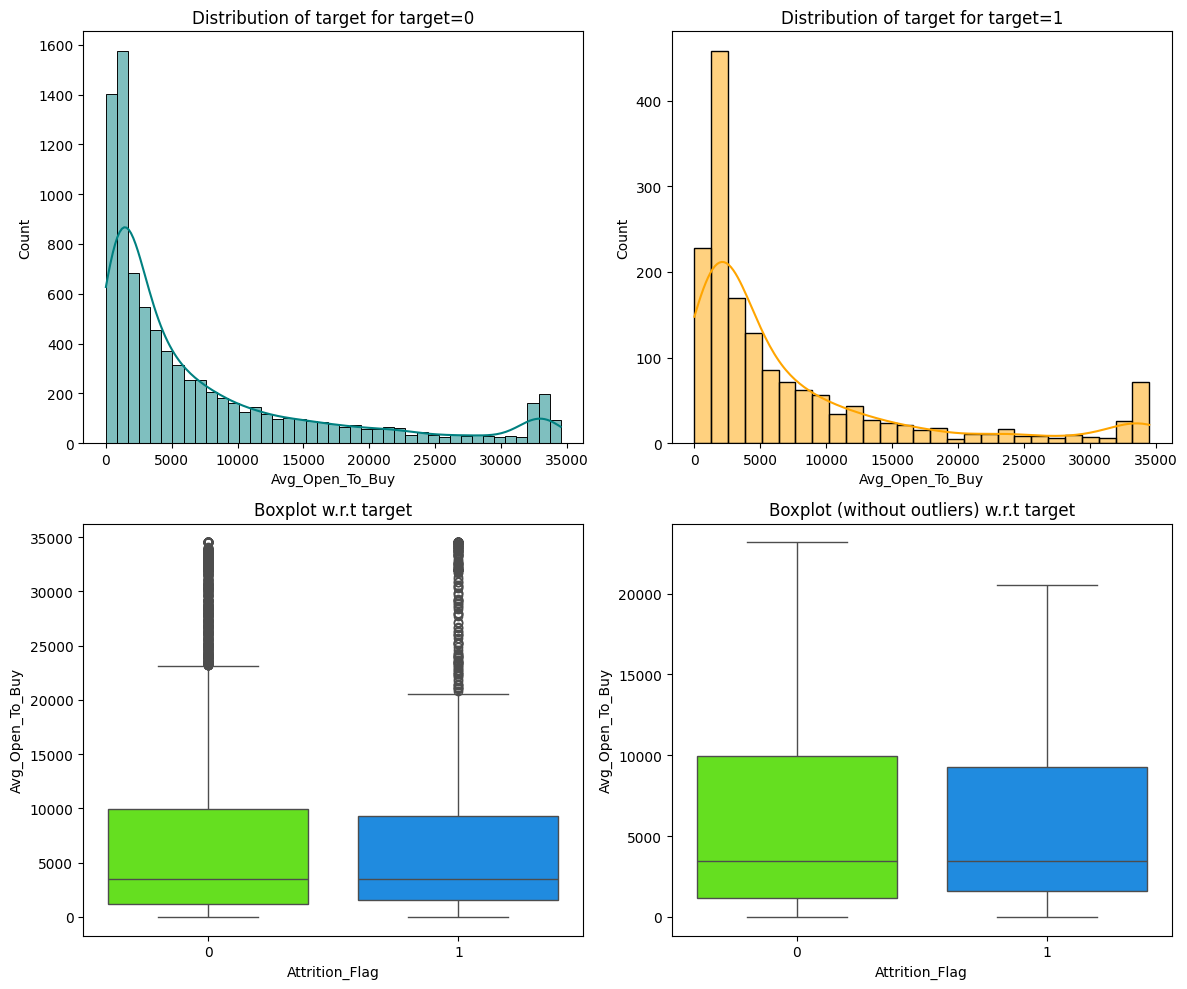

In [ ]:
distribution_plot_wrt_target(churn, "Avg_Open_To_Buy", "Attrition_Flag")

### Attrition_Flag vs Total_Trans_Amt Analysis

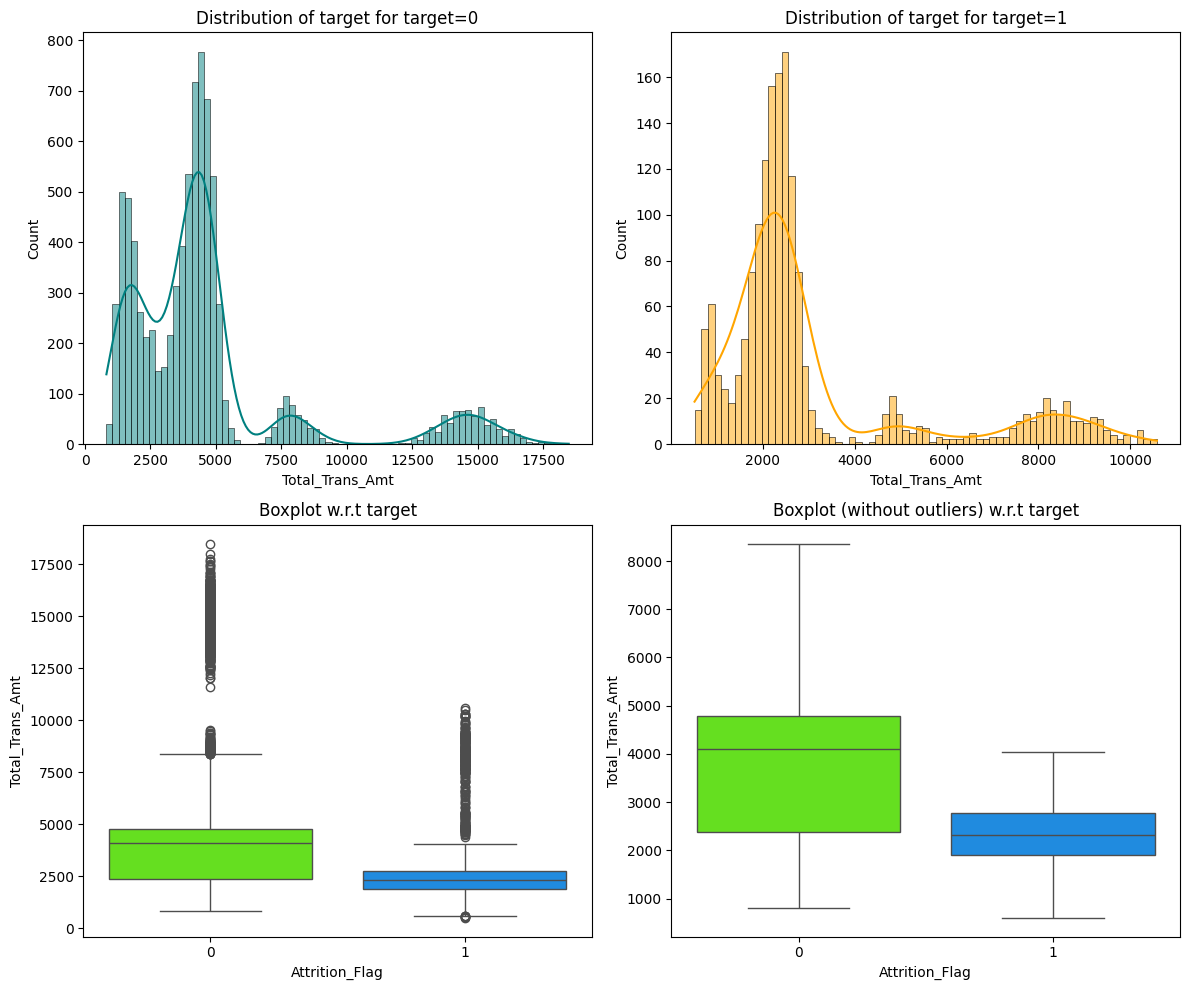

In [ ]:
distribution_plot_wrt_target(churn, "Total_Trans_Amt", "Attrition_Flag")

### Attrition_Flag vs Total_Trans_ct Analysis

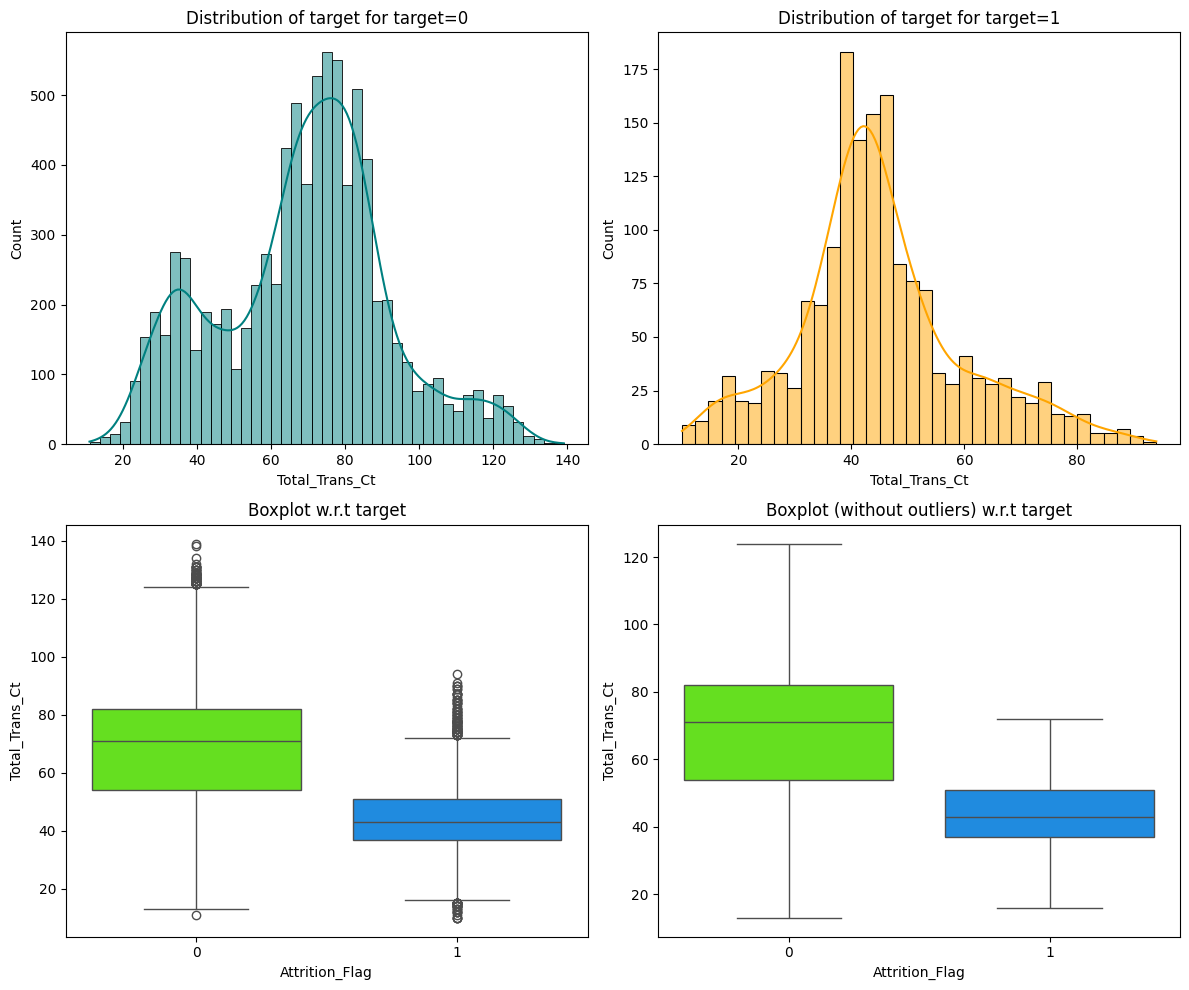

In [ ]:
distribution_plot_wrt_target(churn, "Total_Trans_Ct", "Attrition_Flag")

### Attrition_Flag vs Total_Ct_Chng_Q4_Q1 Analysis

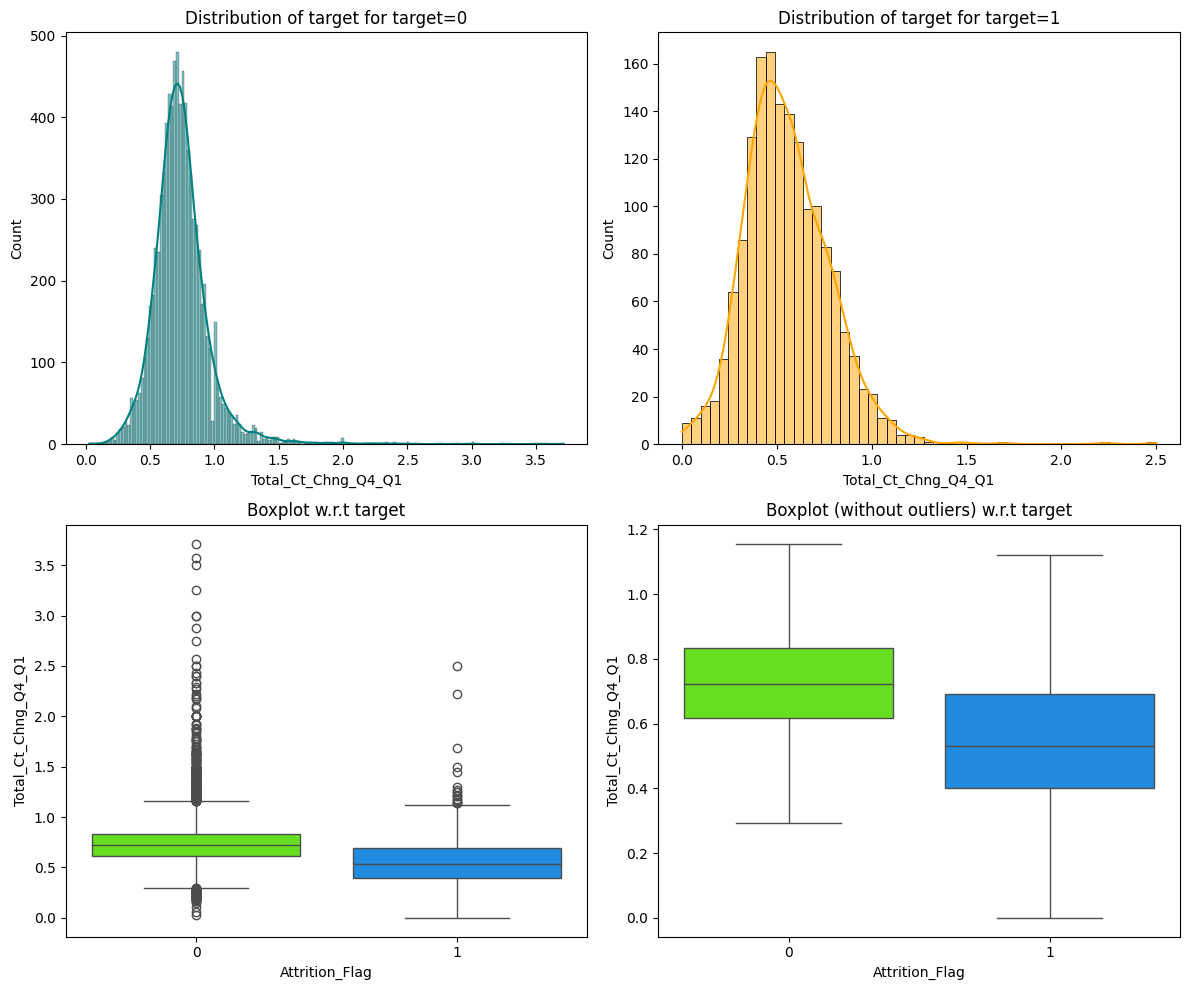

In [ ]:
distribution_plot_wrt_target(churn, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

#### Attrition_Flag vs Total_Amt_Chng_Q4_Q1 Analysis

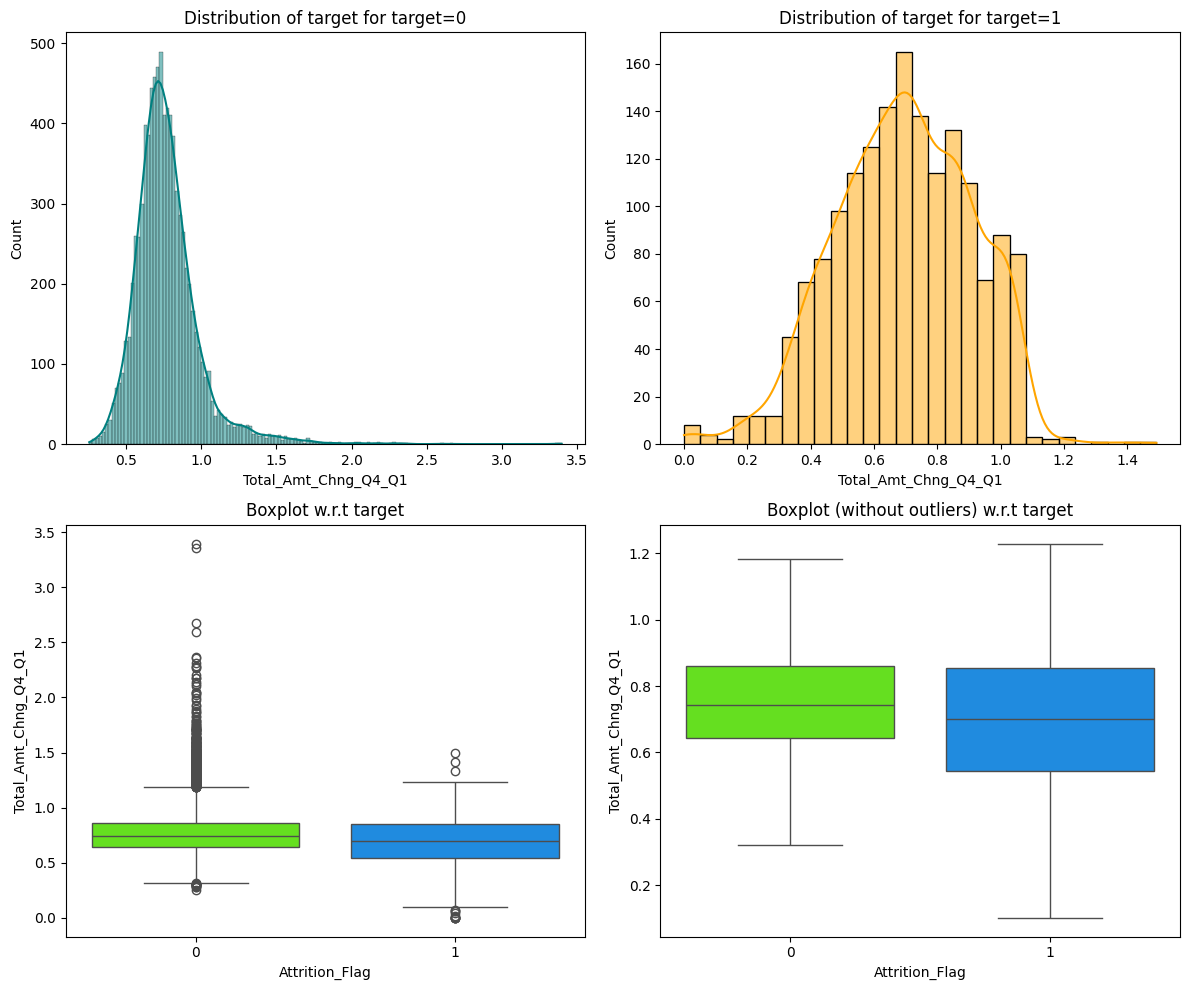

In [ ]:
distribution_plot_wrt_target(churn, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

### Attrition_Flag vs Avg_Utilization_Ratio Analysis

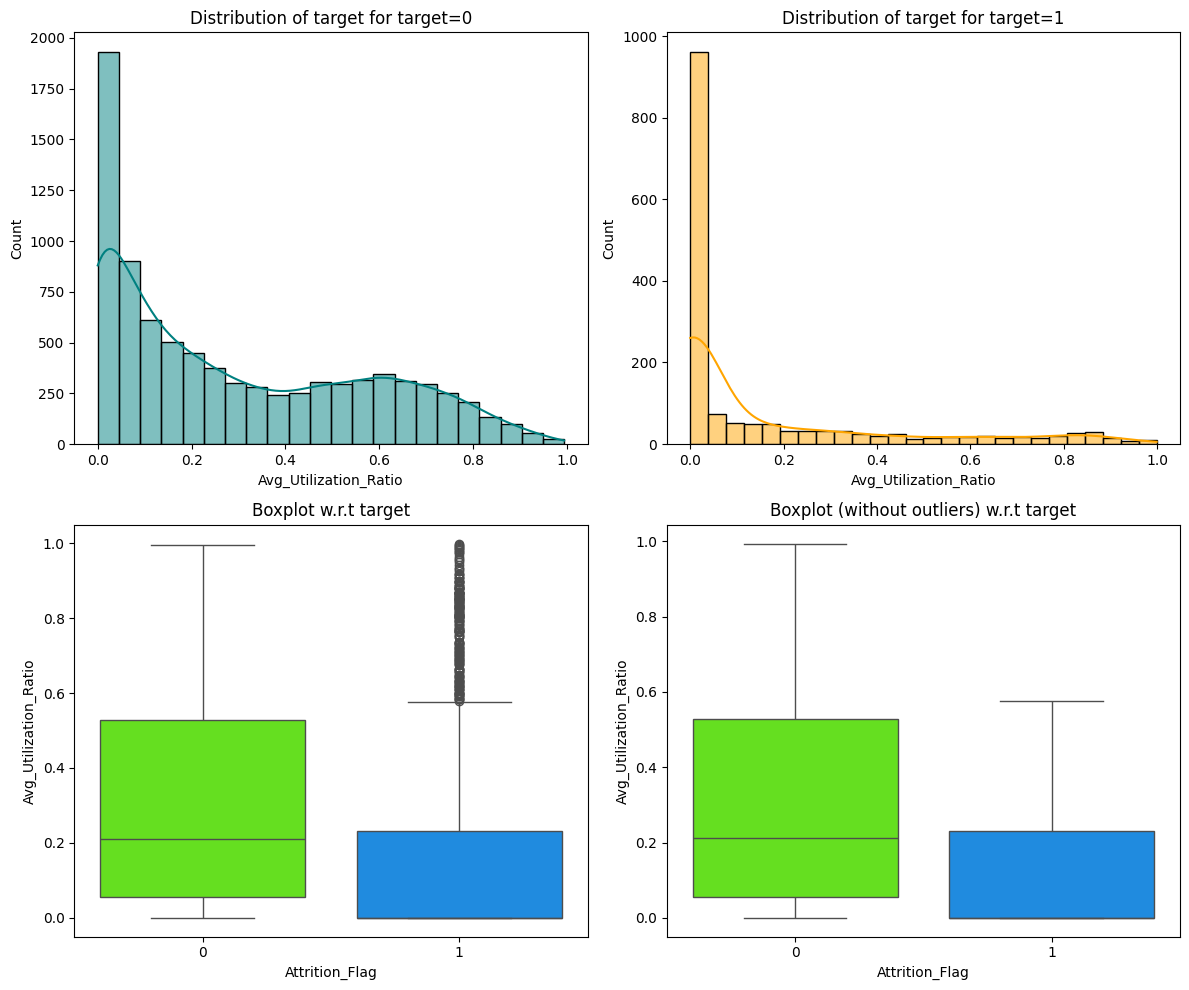

In [ ]:
distribution_plot_wrt_target(churn, "Avg_Utilization_Ratio", "Attrition_Flag")

## Missing Values Analysis

### Income Category Missing Values Analysis

In [ ]:
churn.groupby(['Gender','Income_Category']).size().unstack().fillna(0).astype(int)

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Gender                                                             
F                      0         1014            0             0   
M                    727          776         1402          1535   

Income_Category  Less than $40K   abc  
Gender                                 
F                          3284  1060  
M                           277    52

In [ ]:
# what are the Income_Category values to the gender == F column

churn[churn['Gender']=='F'].groupby(['Income_Category']).size().fillna(0).astype(int)


Income_Category
$40K - $60K       1014
Less than $40K    3284
abc               1060
dtype: int64

**Observation:**

- 95% of the missing Income_Category belongs to Female customers (1060 of 1112 rows)
- Less than $40k make up 76% of the known female income values and 61% of all income values. Therefore, we should impute the missing values in this category with "Most Frequent"

### Marital Status Missing Values Analysis

In [ ]:
# how many of the missing values in Marital Status belong to Gender == "F" and how many belong to Gender == "M"

churn[churn['Marital_Status'].isna()].groupby(['Gender']).size().fillna(0).astype(int)


Gender
F    380
M    369
dtype: int64

**Observation:**

- I couldn't find a correlation between Marital Status and other features, so we will impute with the Mode in this column

### Education Level Missing Value Analysis

In [ ]:
# what is the average education level value

print(churn['Education_Level'].mode().values[0])


Graduate


In [ ]:
# How many of the Education Level missing values have a Gender == "M" and Gender =="F"
churn[churn['Education_Level'].isna()].groupby(['Gender']).size().fillna(0).astype(int)


Gender
F    812
M    707
dtype: int64

In [ ]:
# what is the average education level for gender == F
churn[churn['Gender'] == 'F']['Education_Level'].mode().values[0]

'Graduate'

In [ ]:
churn[churn['Gender'] == 'M']['Education_Level'].mode().values[0]

'Graduate'

[Text(0, 0, 'High School'),
 Text(1, 0, 'Graduate'),
 Text(2, 0, 'Uneducated'),
 Text(3, 0, 'College'),
 Text(4, 0, 'Post-Graduate'),
 Text(5, 0, 'Doctorate')]

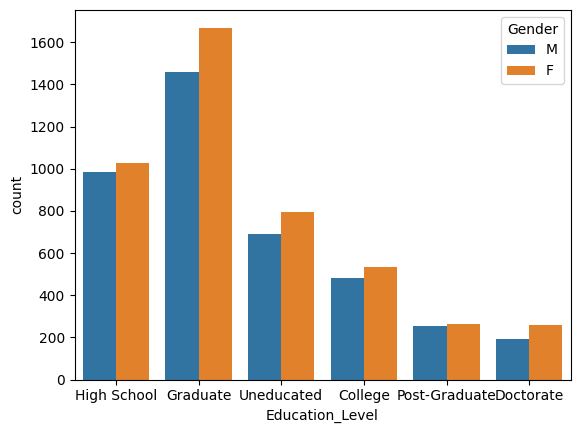

In [ ]:
# Make a graph that shows education levels with a hue of Gender
sns.countplot(data=churn, x='Education_Level', hue="Gender" )

#rotate x-axis labels
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)


**Observations:**

- The most frequent education level is Graduate.
- Slightly more than half the missing values belong to women
- The most frequent education level for women and men is graduate. Therefore, we will impute missing education values with Most Frequent.

# Data Pre-processing

**We have seen a lot of Outliers, so we need to determine what they are and handle them**

- We will first make a copy of the data

In [ ]:
# Determine the upper and lower quantiles
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)

# Calculation of the IQR
IQR = Q3 - Q1

# Define upper and lower outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# find the percent of outliers in each column
((churn.select_dtypes(include=["float64", "int64"]) < lower) | (churn.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(churn) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

### Feature Engineering

In [ ]:
data = churn.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# drop the Avg_Open_To_Buy column because it is 100% correlated to the Credit_Limit column
data.drop(columns=["Avg_Open_To_Buy"], inplace=True)

In [ ]:
# change objects to Categorical

## Train Test Split

### Missing Value Prep




In [ ]:
# Replace missing values with NaN
data["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
# Get updated missing column values
data.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# Dividing train data into X and y (traget variable)
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


In [ ]:
print("Row count in train data =", X_train.shape[0])
print("Row count in validation data =", X_val.shape[0])
print("Row count in test data =", X_test.shape[0])

Row count in train data = 6075
Row count in validation data = 2026
Row count in test data = 2026


## Missing Value Imputation

In [ ]:
# creating instance of SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Create a variable to store a list of the columns needing imputation
col_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Impute categorical columns
X_train[col_to_impute] = imputer.fit_transform(X_train[col_to_impute])
X_val[col_to_impute] = imputer.transform(X_val[col_to_impute])
X_test[col_to_impute] = imputer.transform(X_test[col_to_impute])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print("Training data missing values:\n",X_train.isna().sum())
print("-" * 30)
print("Validation data missing values:\n",X_val.isna().sum())
print("-" * 30)
print("Test data missing values:\n",X_test.isna().sum())

Training data missing values:
 Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Validation data missing values:
 Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit          

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1100
Single       770
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         948
High School      381
Uneducated       300
College          196
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     1060
Single       804
Divorced     162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    933
$40K - $60K       370
$60K - $80K       292
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set
print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 30)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 30)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 30)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 30)

Target value ratio in y
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
******************************
Target value ratio in y_train
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
******************************
Target value ratio in y_val
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
******************************
Target value ratio in y_test
0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64
******************************


In [ ]:
# find the percent of outliers in Training dataset
((X_train.select_dtypes(include=["float64", "int64"]) < lower) | (churn.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(churn) * 100

Attrition_Flag             9.638
Avg_Open_To_Buy            5.658
Avg_Utilization_Ratio      0.000
Contacts_Count_12_mon      3.752
Credit_Limit               5.826
Customer_Age               0.010
Dependent_count            0.000
Months_Inactive_12_mon     1.955
Months_on_book             2.370
Total_Amt_Chng_Q4_Q1       2.400
Total_Ct_Chng_Q4_Q1        2.390
Total_Relationship_Count   0.000
Total_Revolving_Bal        0.000
Total_Trans_Amt            5.224
Total_Trans_Ct             0.010
dtype: float64

In [ ]:
# find the percent of outliers in Validation dataset
((X_val.select_dtypes(include=["float64", "int64"]) < lower) | (churn.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(churn) * 100

Attrition_Flag             3.219
Avg_Open_To_Buy            1.728
Avg_Utilization_Ratio      0.000
Contacts_Count_12_mon      1.205
Credit_Limit               1.758
Customer_Age               0.010
Dependent_count            0.000
Months_Inactive_12_mon     0.691
Months_on_book             0.731
Total_Amt_Chng_Q4_Q1       0.721
Total_Ct_Chng_Q4_Q1        0.642
Total_Relationship_Count   0.000
Total_Revolving_Bal        0.000
Total_Trans_Amt            1.619
Total_Trans_Ct             0.000
dtype: float64

In [ ]:
# find the percent of outliers in Testing datasets
((X_test.select_dtypes(include=["float64", "int64"]) < lower) | (churn.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(churn) * 100

Attrition_Flag             3.209
Avg_Open_To_Buy            2.123
Avg_Utilization_Ratio      0.000
Contacts_Count_12_mon      1.254
Credit_Limit               2.133
Customer_Age               0.000
Dependent_count            0.000
Months_Inactive_12_mon     0.622
Months_on_book             0.711
Total_Amt_Chng_Q4_Q1       0.790
Total_Ct_Chng_Q4_Q1        0.859
Total_Relationship_Count   0.000
Total_Revolving_Bal        0.000
Total_Trans_Amt            2.005
Total_Trans_Ct             0.010
dtype: float64

### Encoding Categorical Variables

In [ ]:
# Create dummy variables for the Train, Validate, Test sets
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 28) (2026, 28) (2026, 28)


# Model Building

### Model evaluation criterion

**The possible outcomes of predictions made by a classification model will look like this:**

**-True Positives** : The cases in which we predicted YES and the actual output was also YES.

**-True Negatives** : The cases in which we predicted NO and the actual output was NO.

**-False Positives** : The cases in which we predicted YES and the actual output was NO.

**-False Negatives** : The cases in which we predicted NO and the actual output was YES.


**Which metric to optimize?**

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

Minimizing false negatives will be most important, as we want to identify those who are most likely to Attrite


### Functions to calculate performance and confusion matrix

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building w/ original data, no mods:

- BaggingClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier
- DecisionTreeClassifier
- XGBCClassifier



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9795081967213115
Random forest: 1.0
GBM: 0.8790983606557377
Adaboost: 0.8534836065573771
dtree: 1.0
Xgboost: 1.0

Validation Performance:

Bagging: 0.754601226993865
Random forest: 0.754601226993865
GBM: 0.8588957055214724
Adaboost: 0.8650306748466258
dtree: 0.8190184049079755
Xgboost: 0.8773006134969326


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9795, Validation Score: 0.7546, Difference: 0.2249
Random forest: Training Score: 1.0000, Validation Score: 0.7546, Difference: 0.2454
GBM: Training Score: 0.8791, Validation Score: 0.8589, Difference: 0.0202
Adaboost: Training Score: 0.8535, Validation Score: 0.8650, Difference: -0.0115
dtree: Training Score: 1.0000, Validation Score: 0.8190, Difference: 0.1810
Xgboost: Training Score: 1.0000, Validation Score: 0.8773, Difference: 0.1227


In [ ]:
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))



Cross-Validation Performance:

Bagging: 74.48403976975406
Random forest: 71.20303506017791
GBM: 81.86132914704342
Adaboost: 81.65463108320252
dtree: 74.18001046572475
Xgboost: 85.75457875457874


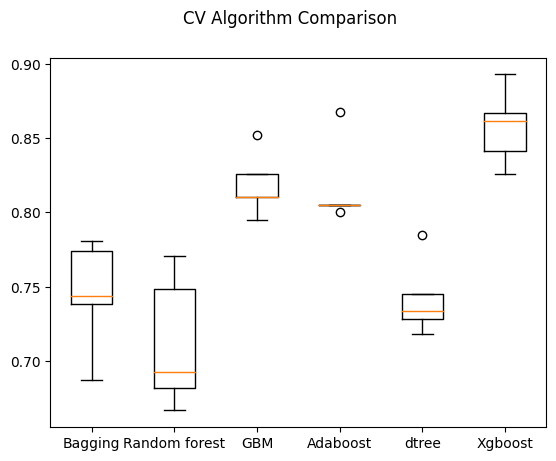

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("CV Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

**Observations for top 3 models:**

**Validation, Difference, CV Scores**
- Xgboost: 0.877, 0.1227, 85.75
- Adaboost: 0.865, -0.0115, 81.65
- GBM: 0.858, 0.0202, 81.86




## Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 28)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9969262295081968
Random forest: 1.0
GBM: 0.9293032786885246
Adaboost: 0.882172131147541
dtree: 1.0
Xgboost: 1.0

Validation Performance:

Bagging: 0.8957055214723927
Random forest: 0.8588957055214724
GBM: 0.8926380368098159
Adaboost: 0.8957055214723927
dtree: 0.8343558282208589
Xgboost: 0.901840490797546


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9984, Validation Score: 0.8957, Difference: 0.1027
Random forest: Training Score: 1.0000, Validation Score: 0.8589, Difference: 0.1411
GBM: Training Score: 0.9808, Validation Score: 0.8926, Difference: 0.0881
Adaboost: Training Score: 0.9657, Validation Score: 0.8957, Difference: 0.0700
dtree: Training Score: 1.0000, Validation Score: 0.8344, Difference: 0.1656
Xgboost: Training Score: 1.0000, Validation Score: 0.9018, Difference: 0.0982


In [ ]:
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))



Cross-Validation Performance:

Bagging: 96.56793473031999
Random forest: 98.21535915642016
GBM: 97.31316746521964
Adaboost: 96.46991475687429
dtree: 95.03827281648675
Xgboost: 98.50949604571957


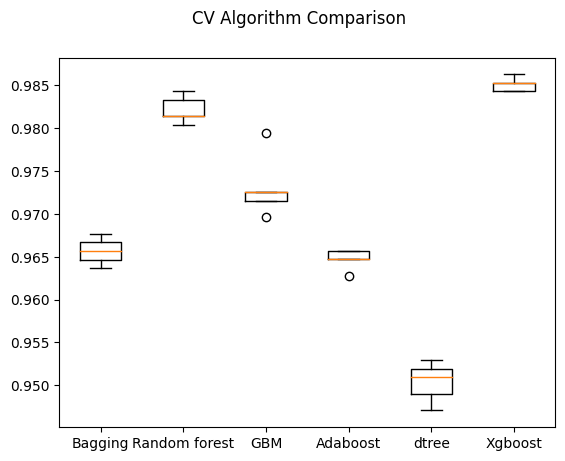

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("CV Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

**Observations for top 3 Oversampled Models**:

**Validation, Difference, CV Scores**

- Xgboost: 0.90, 0.0982, 98.51
- Adaboost: 0.8957, 0.0700, 96.47
- Bagging: 0.8957, 0.1411, 96.57

## Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))


print("After Unsampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Unsampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))


print("After Unsampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Unsampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Unsampling, counts of label 'Yes': 976
After Unsampling, counts of label 'No': 976 

After Unsampling, the shape of train_X: (1952, 28)
After Unsampling, the shape of train_y: (1952,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9918032786885246
Random forest: 1.0
GBM: 0.9795081967213115
Adaboost: 0.9538934426229508
dtree: 1.0
Xgboost: 1.0

Validation Performance:

Bagging: 0.9355828220858896
Random forest: 0.9325153374233128
GBM: 0.9570552147239264
Adaboost: 0.9693251533742331
dtree: 0.8926380368098159
Xgboost: 0.9601226993865031


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9918, Validation Score: 0.9356, Difference: 0.0562
Random forest: Training Score: 1.0000, Validation Score: 0.9325, Difference: 0.0675
GBM: Training Score: 0.9795, Validation Score: 0.9571, Difference: 0.0225
Adaboost: Training Score: 0.9539, Validation Score: 0.9693, Difference: -0.0154
dtree: Training Score: 1.0000, Validation Score: 0.8926, Difference: 0.1074
Xgboost: Training Score: 1.0000, Validation Score: 0.9601, Difference: 0.0399


In [ ]:
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))


Cross-Validation Performance:

Bagging: 90.67660910518055
Random forest: 93.34118262689692
GBM: 93.85243328100472
Adaboost: 93.34275248560964
dtree: 89.24071166928309
Xgboost: 94.98011512297226


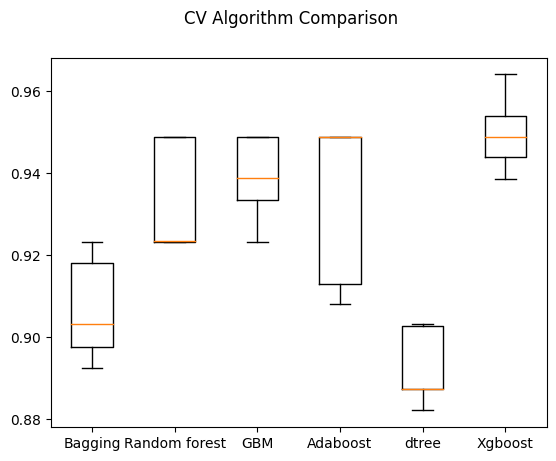

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("CV Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

**Observations for top 3 Undersampled Models:**

**Validation, Difference, CV Scores**

- Adaboost: 0.9693, -0.0154, 93.34
- Xgboost: 0.9601, 0.0399, 94.98
- GBM: 0.9571, 0.0225, 93.85

## HyperparameterTuning

### Model 1: Gradient Boosting with Oversampling

In [ ]:
%%time

# Create the pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.5,0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1} with CV score=0.9488217976101136:
CPU times: user 3.88 s, sys: 498 ms, total: 4.38 s
Wall time: 2min 50s


In [ ]:
# build model based on best parameters
tuned_gbm_over = GradientBoostingClassifier(
    max_features=0.5,
    learning_rate=0.1,
    n_estimators=100,
    subsample= 0.7,

)
tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.5, subsample=0.7)

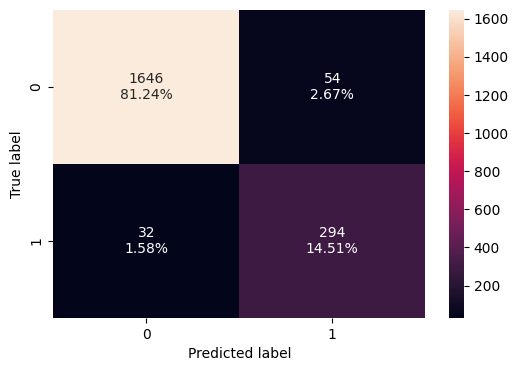

In [ ]:
confusion_matrix_sklearn(tuned_gbm_over, X_val, y_val)

In [ ]:
# Predicting the target for train and validation set
pred_train = tuned_gbm_over.predict(X_train_over)
pred_val = tuned_gbm_over.predict(X_val)

#Checking recall score on oversampledtrain and validation set
print("Recall Score Train:",recall_score(y_train_over, pred_train))
print("Recall Score Validation:",recall_score(y_val, pred_val))


Recall Score Train: 0.9807805452049422
Recall Score Validation: 0.901840490797546


In [ ]:
#Checking recall score on oversampledtrain and validation set
print("Accuracy Score Train:",accuracy_score(y_train_over, pred_train))
print("Accuracy Score Validation:",accuracy_score(y_val, pred_val))

Accuracy Score Train: 0.9760737399490096
Accuracy Score Validation: 0.9575518262586377


In [ ]:
# gbm_over test scores
tuned_gbm_train_prf= model_performance_classification_sklearn(tuned_gbm_over, X_train_over, y_train_over)
print("Training performance \n", tuned_gbm_train_prf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.976   0.981      0.972 0.976


In [ ]:
# gbm_over validation scores
tuned_gbm_val_prf= model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
print("Validation performance \n", tuned_gbm_val_prf)

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.958   0.902      0.845 0.872


In [ ]:
# What is the difference in the performance of the trained data and the validation data scores
difference1 = tuned_gbm_train_prf["Recall"][0] - tuned_gbm_val_prf["Recall"][0]
print("Difference in performance between trained and validation data:", difference1)


Difference in performance between trained and validation data: 0.07894005440739615


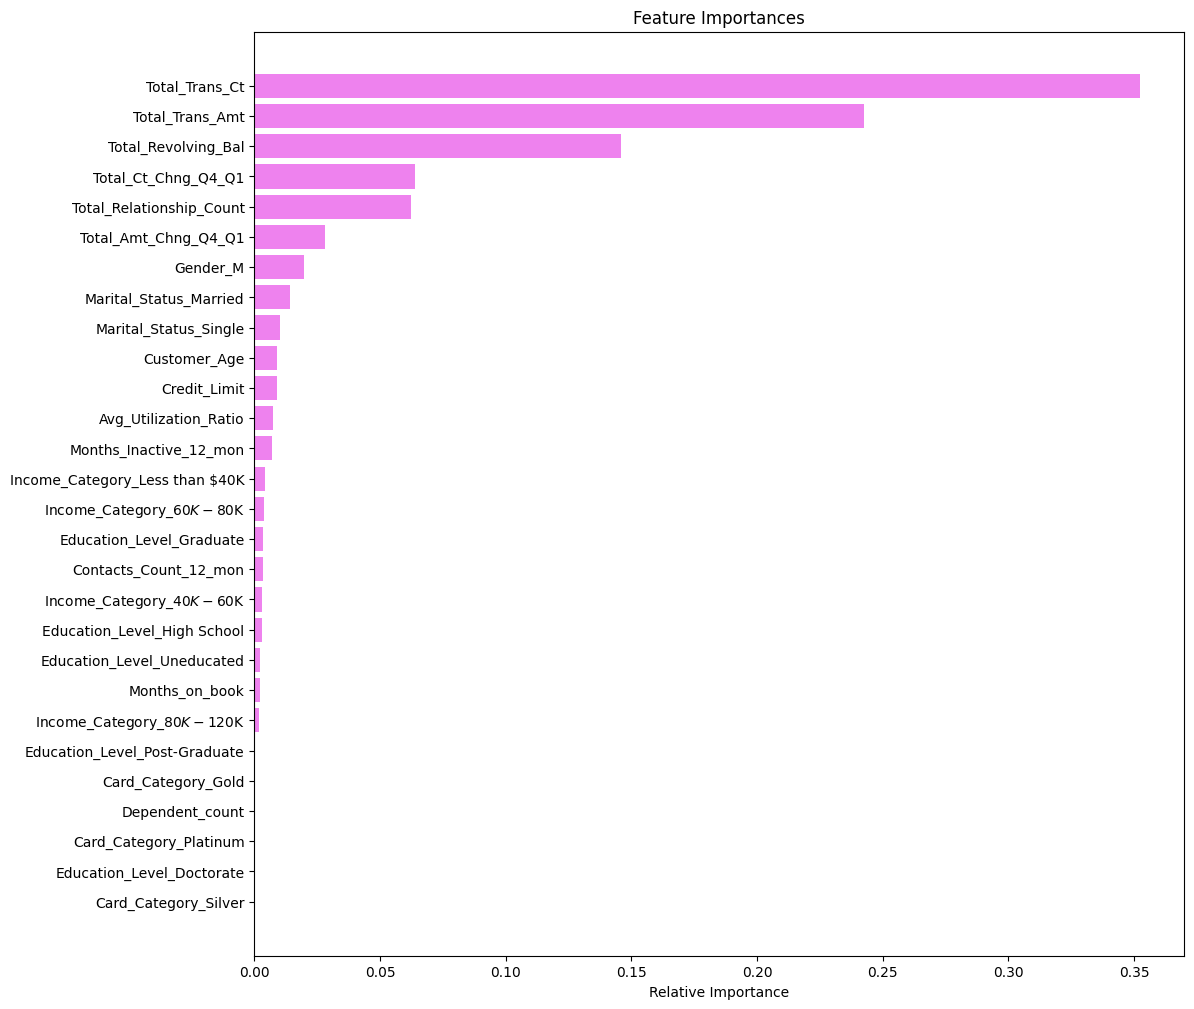

In [ ]:
# Feature Importances of gradient boost model
feature_names = X_val.columns
importances = tuned_gbm_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

The Gradient Boosting Model with OverSampled data

- Accuracy Training vs Validation scores: 0.976, 0.955
- Recall Training vs Validation scores: 0.980, 0.899
- Precision Training vs Validation sores: 0.972, 0.835
- F1 Training vs Validation scores: 0.976, 0.866
- Cross Validation score: 0.9488217976101136

The model is stable and performs well in all evaluation criteria with a training vs validation performance difference of 0.0814

### Model 2: Bagging with Oversampling

In [ ]:
%%time
# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_features': [0.7,0.8,0.9],
              'max_samples': [0.8, 0.9, 1],
              'n_estimators': [30,50,70],
             }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.7} with CV score=0.9741166849467952:
CPU times: user 3.35 s, sys: 184 ms, total: 3.54 s
Wall time: 1min 29s


In [ ]:
# build model based on best parameters
tuned_bagging_over = BaggingClassifier(n_estimators= 50, max_samples= 0.9, max_features= 0.7)
tuned_bagging_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=50)

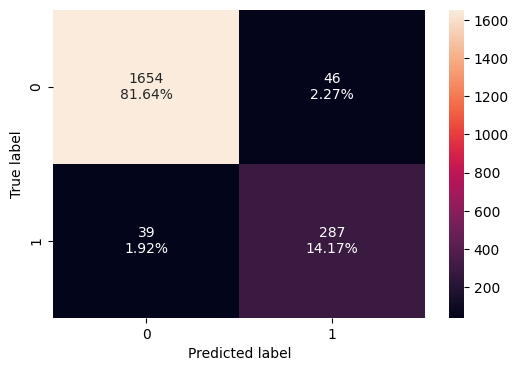

In [ ]:
confusion_matrix_sklearn(tuned_bagging_over, X_val, y_val)

In [ ]:
# Predicting the target for train and validation set
pred_train = tuned_bagging_over.predict(X_train_over)
pred_val = tuned_bagging_over.predict(X_val)

#Checking recall score on oversampledtrain and validation set
print("Recall Score Train:",recall_score(y_train_over, pred_train))
print("Recall Score Validation:",recall_score(y_val, pred_val))

#Checking recall score on oversampledtrain and validation set
print("Accuracy Score Train:",accuracy_score(y_train_over, pred_train))
print("Accuracy Score Validation:",accuracy_score(y_val, pred_val))

Recall Score Train: 1.0
Recall Score Validation: 0.8803680981595092
Accuracy Score Train: 1.0
Accuracy Score Validation: 0.9580454096742349


In [ ]:
# bagging_over test scores
tuned_bagging_train_prf= model_performance_classification_sklearn(tuned_bagging_over, X_train_over, y_train_over)
print("Training performance \n", tuned_bagging_train_prf)

# bagging_over validation scores
tuned_bagging_val_prf= model_performance_classification_sklearn(tuned_bagging_over, X_val, y_val)
print("Validation performance \n", tuned_bagging_val_prf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Validation performance 
    Accuracy  Recall  Precision    F1
0     0.958   0.880      0.862 0.871


In [ ]:
# What is the difference in the performance of the trained data and the validation data scores
difference2 = tuned_bagging_train_prf["Recall"][0] - tuned_bagging_val_prf["Recall"][0]
print("Difference in performance between trained and validation data:", difference2)

Difference in performance between trained and validation data: 0.11963190184049077


**Observations:**

**The Bagging Model with OverSampled data**

- **Accuracy** Training vs Validation scores: 1, 0.962
- **Recall** Training vs Validation scores: 1, 0.893
- **Precision** Training vs Validation sores: 1, 0.873
- **F1** Training vs Validation scores: 1, 0.833
- **Cross Validation** score: 0.9741166849467952


The model is stable and performs well in all evaluation criteria with a training vs validation performance difference of 0.1073

However, I am concerned that this model will be unstable on unseen data as it seems to be overfit in all evaluation criteria on training data.

### Model 3: Adaboost with Undersampling

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.947760334903192:
CPU times: user 1.44 s, sys: 81.4 ms, total: 1.52 s
Wall time: 38.6 s


In [ ]:
# Build model based on best parameters
tuned_ada_un = AdaBoostClassifier(
    learning_rate=0.1,
    n_estimators=100,
    base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1),

)
tuned_ada_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100)

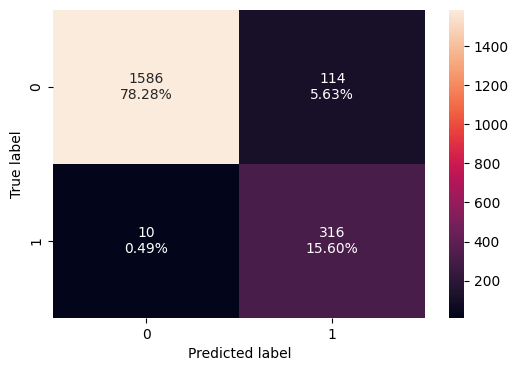

In [ ]:
confusion_matrix_sklearn(tuned_ada_un, X_val, y_val)

In [ ]:
# Predicting the target for train and validation set
pred_train = tuned_ada_un.predict(X_train_un)
pred_val = tuned_ada_un.predict(X_val)

#Checking recall score on oversampledtrain and validation set
print("Recall Score Train:",recall_score(y_train_un, pred_train))
print("Recall Score Validation:",recall_score(y_val, pred_val))

#Checking recall score on oversampledtrain and validation set
print("Accuracy Score Train:",accuracy_score(y_train_un, pred_train))
print("Accuracy Score Validation:",accuracy_score(y_val, pred_val))

Recall Score Train: 0.9948770491803278
Recall Score Validation: 0.9693251533742331
Accuracy Score Train: 0.9912909836065574
Accuracy Score Validation: 0.9387956564659428


In [ ]:
# Ada undersampled test scores
tuned_ada_train_prf= model_performance_classification_sklearn(tuned_ada_un, X_train_un, y_train_un)
print("Training performance \n", tuned_ada_train_prf)

# Ada underdsampled validation scores
tuned_ada_val_prf= model_performance_classification_sklearn(tuned_ada_un, X_val, y_val)
print("Validation performance \n", tuned_ada_val_prf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.991   0.995      0.988 0.991
Validation performance 
    Accuracy  Recall  Precision    F1
0     0.939   0.969      0.735 0.836


In [ ]:
# What is the difference in the performance of the trained data and the validation data scores
difference3 = tuned_ada_train_prf["Recall"][0] - tuned_ada_val_prf["Recall"][0]
print("Difference in performance between trained and validation data:", difference3)

Difference in performance between trained and validation data: 0.025551895806094738


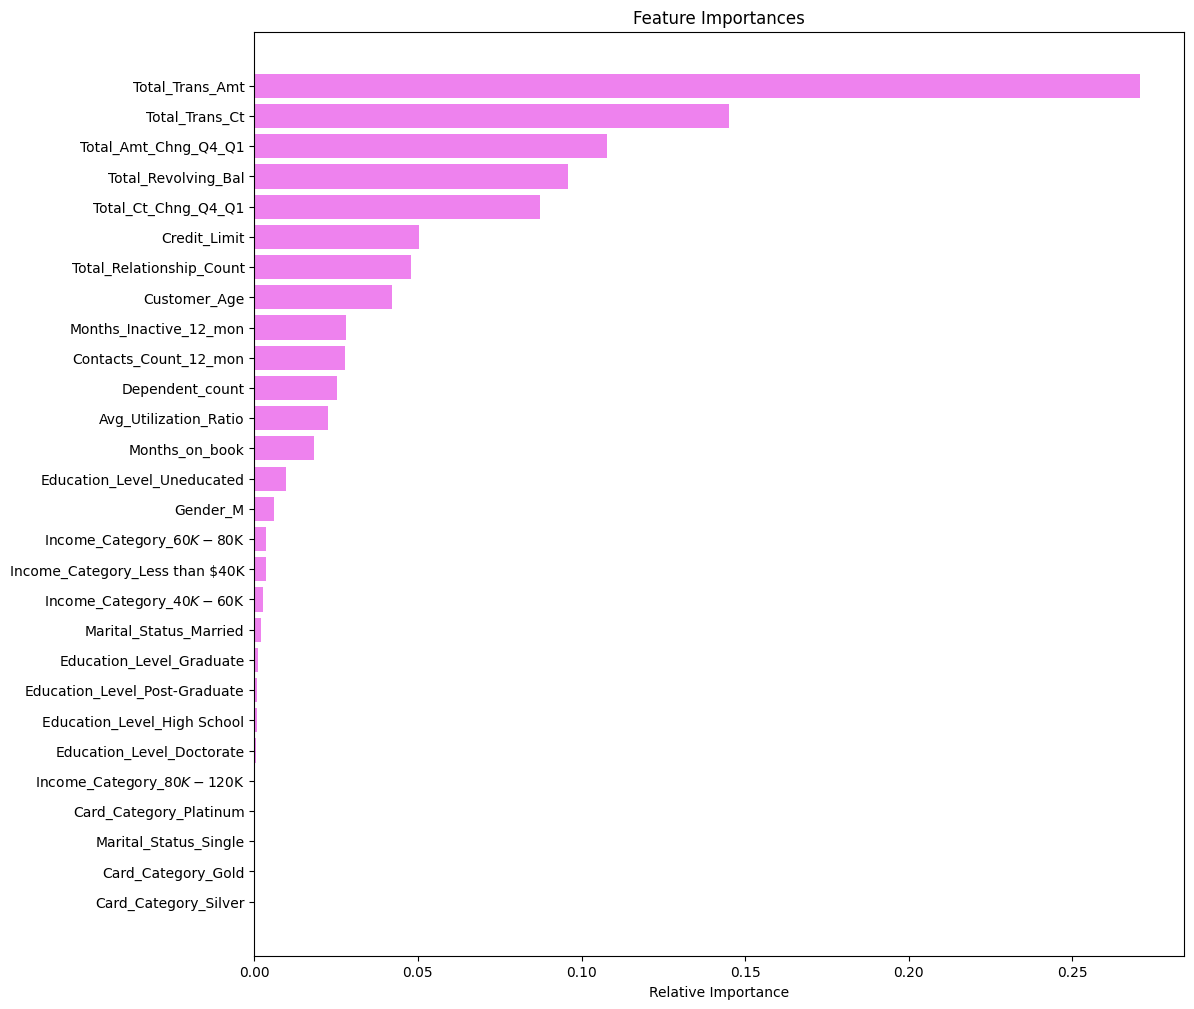

In [ ]:
# Feature Importances of Adaboost model
feature_names = X_val.columns
importances = tuned_ada_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

**AdaBoost Model with UnderSampled data**

- **Accuracy** Training vs Validation scores: 0.991, 0.939
- **Recall** Training vs Validation scores: 0.995, 0.969
- **Precision** Training vs Validation sores: 0.988, 0.735
- **F1** Training vs Validation scores: 0.991, 0.836
- **Cross Validation** score: 0.9477

The model is stable and performs well in all evaluation criteria with a training vs validation performance difference of 0.0255

### Model 4: Xgboost with UnderSampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9979591836734695:
CPU times: user 1.69 s, sys: 112 ms, total: 1.8 s
Wall time: 35.9 s


In [ ]:
# Build model based on best parameters
tuned_xgb_un = XGBClassifier(
    subsample= 0.7, scale_pos_weight= 5, n_estimators= 50, learning_rate= 0.01, gamma= 3

)
tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

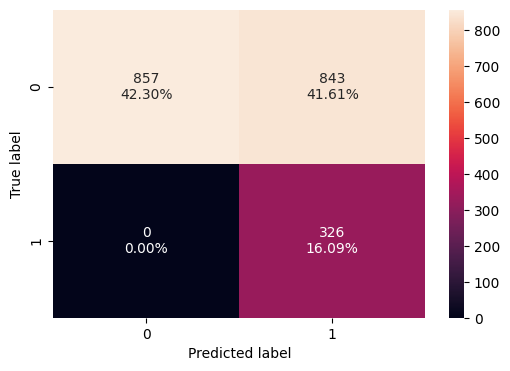

In [ ]:
confusion_matrix_sklearn(tuned_xgb_un, X_val, y_val)

In [ ]:
# bagging_over test scores
tuned_xgb_train_prf= model_performance_classification_sklearn(tuned_xgb_un, X_train_un, y_train_un)
print("Training performance \n", tuned_xgb_train_prf)

# bagging_over validation scores
tuned_xgb_val_prf= model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
print("Validation performance \n", tuned_xgb_val_prf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.761   1.000      0.676 0.807
Validation performance 
    Accuracy  Recall  Precision    F1
0     0.584   1.000      0.279 0.436


In [ ]:
# What is the difference in the performance of the trained data and the validation data scores
difference4 = tuned_xgb_train_prf["Recall"][0] - tuned_xgb_val_prf["Recall"][0]
print("Difference in performance between trained and validation data:", difference4)

Difference in performance between trained and validation data: 0.0


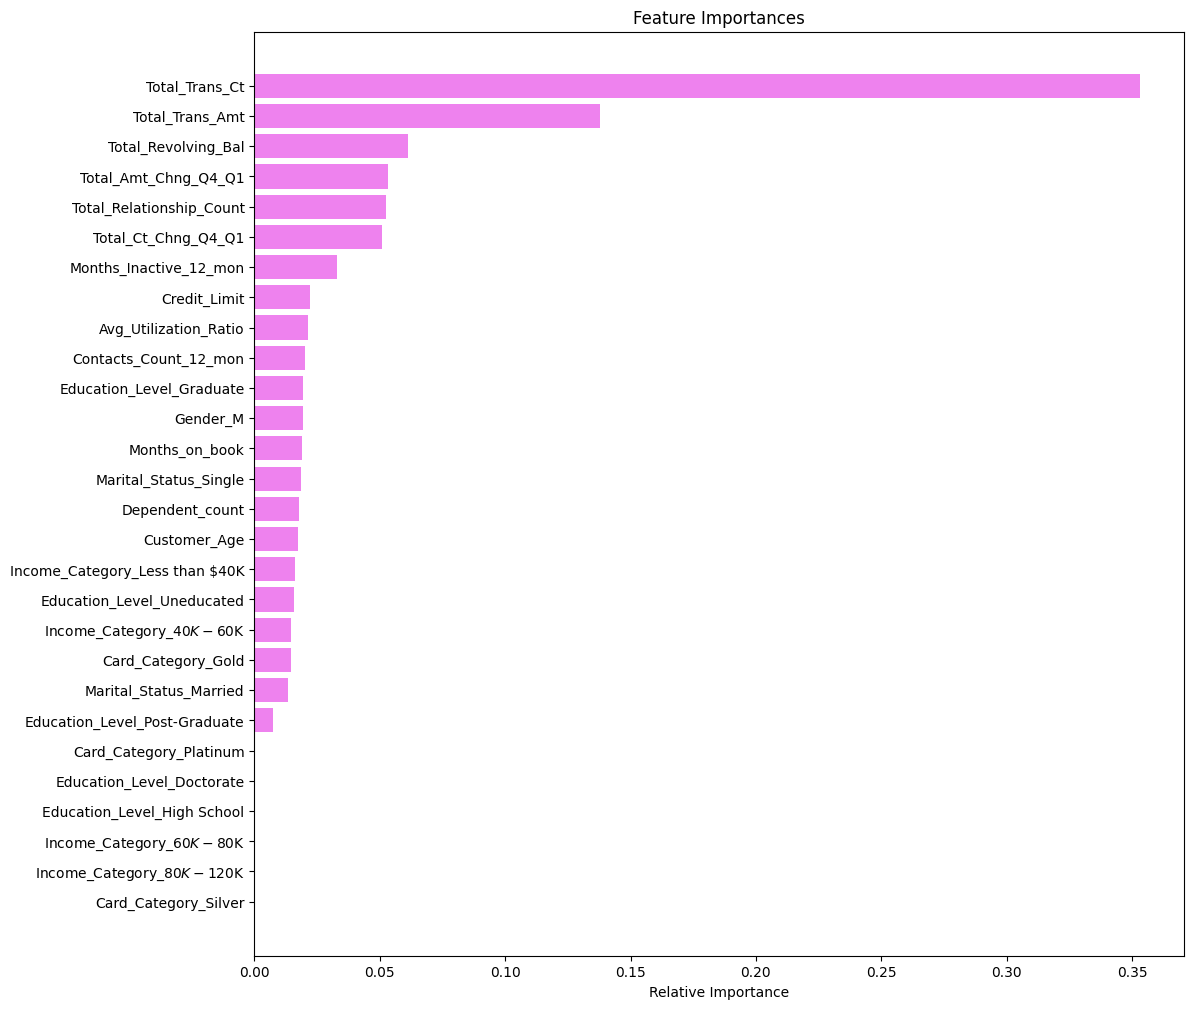

In [ ]:
# Feature Importances of Xgboost model
feature_names = X_val.columns
importances = tuned_xgb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

**The Bagging Model with OverSampled data**

- **Accuracy** Training vs Validation scores: 0.761, 0.584
- **Recall** Training vs Validation scores: 1, 1
- **Precision** Training vs Validation sores: 0.676, 0.279
- **F1** Training vs Validation scores: 0.8, 0.436
- **Cross Validation** score: 0.9741166849467952


I am concerned that this model is unreliable and will be unstable on unseen data as it seems to be overfit to recall and performs terribly on all other performance metrics.

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_prf.T,
        tuned_bagging_train_prf.T,
        tuned_ada_train_prf.T,
        tuned_xgb_train_prf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "Bagging trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "Xgboost trained with Undersampled data"
  ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient boosting trained with Oversampled data  \
Accuracy                                             0.976   
Recall                                               0.981   
Precision                                            0.972   
F1                                                   0.976   

           Bagging trained with Oversampled data  \
Accuracy                                   1.000   
Recall                                     1.000   
Precision                                  1.000   
F1                                         1.000   

           AdaBoost trained with Undersampled data  \
Accuracy                                     0.991   
Recall                                       0.995   
Precision                                    0.988   
F1                                           0.991   

           Xgboost trained with Undersampled data  
Accuracy                                    0.761  
Recall                                      1.000  
Precision                                   0.676  
F1                                          0.807

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_prf.T,
        tuned_bagging_val_prf.T,
        tuned_ada_val_prf.T,
        tuned_xgb_val_prf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "Bagging trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "Xgboost trained with Undersampled data"
  ]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gradient boosting trained with Oversampled data  \
Accuracy                                             0.958   
Recall                                               0.902   
Precision                                            0.845   
F1                                                   0.872   

           Bagging trained with Oversampled data  \
Accuracy                                   0.958   
Recall                                     0.880   
Precision                                  0.862   
F1                                         0.871   

           AdaBoost trained with Undersampled data  \
Accuracy                                     0.939   
Recall                                       0.969   
Precision                                    0.735   
F1                                           0.836   

           Xgboost trained with Undersampled data  
Accuracy                                    0.584  
Recall                                      1.000  
Precision                                   0.279  
F1                                          0.436

**Observations:**

Gradient boosting trained woth oversampled data and Adaboost trained with undersampled data have the best overall performance and stability. They also look promising for unseen data.

- **Gradient boosting** has a training vs validation performance difference of 0.0448, CV score=0.9488 and run time of: 3:58

- **AdaBoosting** has a training vs validation performance difference of 0.0255, CV score=0.9477 and run time of  1:10

Bagging with oversampled data and xgboost  with undersampled data both seem to overfit to specific metrics and seem less reliable for use on unseen data

## Test Final Model: Gradientboost trained on oversampled data

In [ ]:
# build model based on best parameters
tuned_gbm_over = GradientBoostingClassifier(
    max_features=0.5,
    learning_rate=0.1,
    n_estimators=100,
    subsample= 0.7,

)
tuned_gbm_over.fit(X_test, y_test)

GradientBoostingClassifier(max_features=0.5, subsample=0.7)

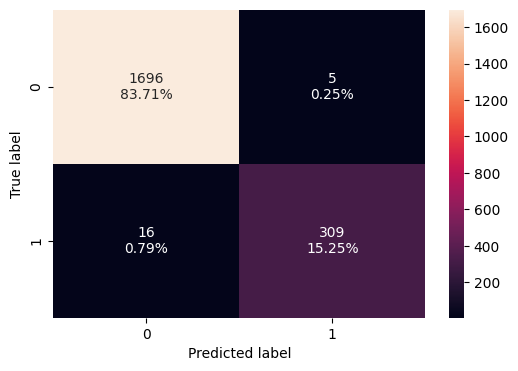

In [ ]:
confusion_matrix_sklearn(tuned_gbm_over, X_test, y_test)

In [ ]:
# Gradientboost oversampled test scores
tuned_gbm_test_prf= model_performance_classification_sklearn(tuned_gbm_over, X_test, y_test)
print("Test data performance \n", tuned_gbm_test_prf)

Test data performance 
    Accuracy  Recall  Precision    F1
0     0.990   0.951      0.984 0.967


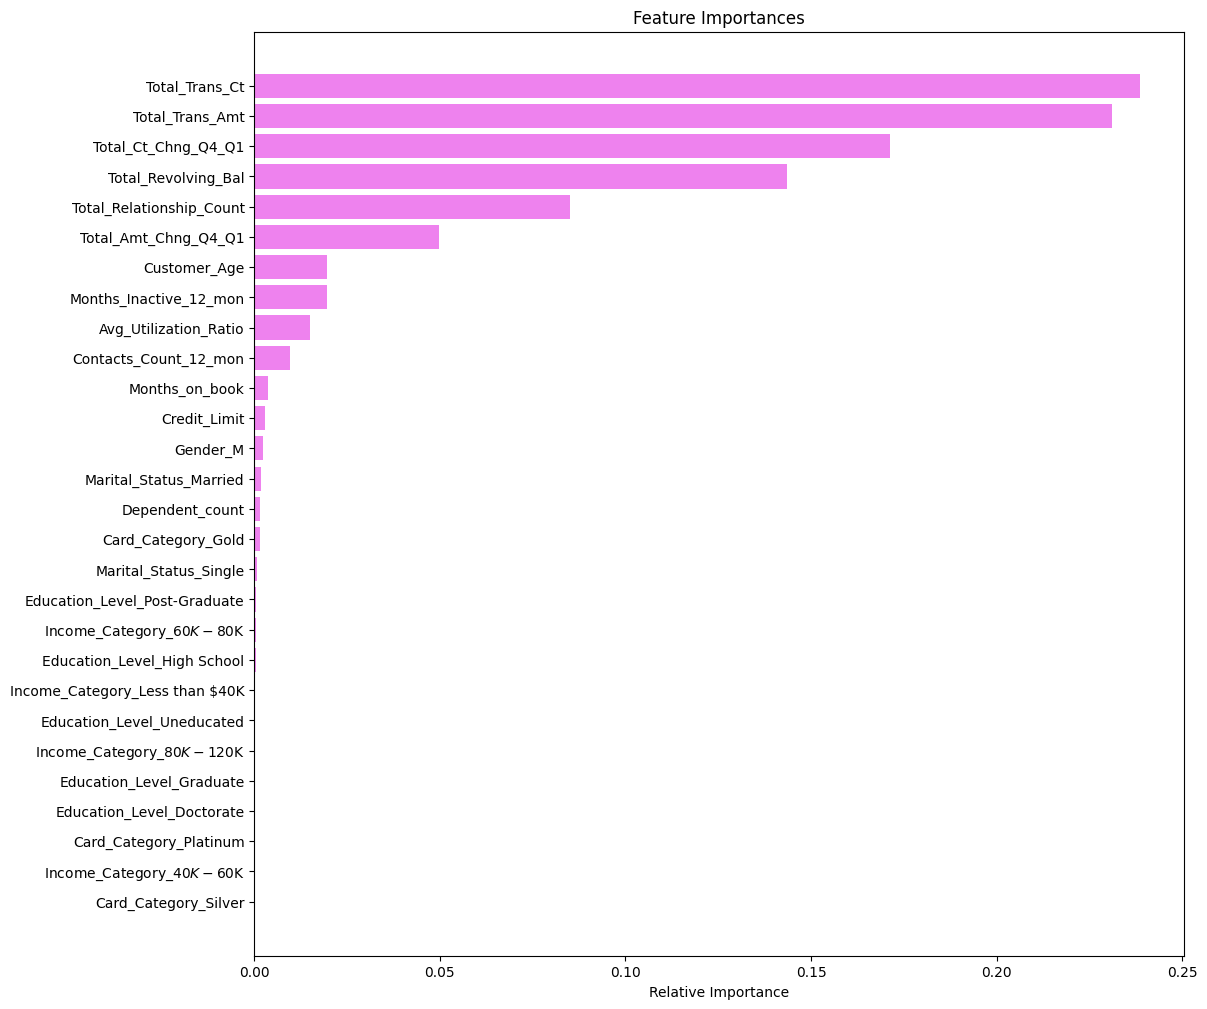

In [ ]:
# Feature Importances of final model
feature_names = X_test.columns
importances = tuned_gbm_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

**Model Insights:**

The final model achieved good and consistent peformance on training, validating and testing data in each of the validating metrics:

- Accuracy Training vs Validation scores: 0.976, 0.955

- Recall Training vs Validation scores: 0.980, 0.899

- Precision Training vs Validation sores: 0.972, 0.835

- F1 Training vs Validation scores: 0.976, 0.866

- Cross Validation score: 0.9488217976101136.

The consistency indicates that it will continue to perform well in production.



**Business Insights**

Complete analysis of the data revealed that:

- customers holding a Blue card account for 93% of all attrited card holders. As the intent is to keep current card holders I would conclude that further analysis ought to be done to determine what about the card leads to attrition.

- Customers with income less that $40k account for 38% of attrition rates.

- This correlates with that fact that women make up 57% of attrition rates with respect to gender and they also account for a greater portion of those in the less that $40k income category.

- Those with credit limits $5k or less are also more likely to renounce their cards, likely due to the small amount being easy to payoff or transfer to another institution.

- Another flag to indicate attrition is the number of contacts a customer has with the bank. The higher the number of contacts, the more likely to leave, with 6 contacts in the preceeding 12 months being the magic number, as all attrited customers with 6 contact with the bank left. This may indicate a dissatisfaction with something pertaining to the card that isn't being resolved.

***